## this notebook integrates multiple scRNAseq runs to one Seurat object. 
> normalization will be done with [sct transform](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1874-1)  
> batch removal will be done with [harmony](https://www.nature.com/articles/s41592-019-0619-0)  
> regression will be based on wilcoxon rank sum test (this is not ideal - but due to software issues the only feasible solution)  
> enrichment analysis will be performed with [enrichR](https://maayanlab.cloud/Enrichr/)  

In [2]:
rm(list=ls())
library(Seurat)
sessionInfo()
getwd()

Attaching SeuratObject

Attaching sp



R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] sp_1.5-0           SeuratObject_4.1.2 Seurat_4.2.0      

loaded via a namespace (and not attached):
  [1] Rtsne_0.16            colorspace_2.0-3      deldir_1.0-6         
  [4] ellipsis_0.3.2        ggridges_0.5.4        IRdisplay_1.1        
  [7]

[1] "/gpfs/data/fs71707/dsam/DARC/DARC/notebooks"

In [2]:
dir=c("/gpfs/data/fs71707/dsam/data/DARC/DARC/")
out=c("/home/fs71707/dsam/data/DARC/DARC/result/")
inter.dat=c("/home/fs71707/dsam/data/DARC/DARC/proc_data/")
w.dir=c("/home/fs71707/dsam/data/DARC/DARC/notebooks/")
sample_ID=c("DARC_Nov22")

### load individual datasets

In [16]:
load(paste0(inter.dat,"Seurat_final_AD2pep.RData"))
AD2pep=sce.seurat1
dim(AD2pep)
AD2pep@meta.data$name=rep("AD2pep", nrow(AD2pep@meta.data))
AD2pep@meta.data$batch=rep(1, nrow(AD2pep@meta.data))
head(AD2pep@meta.data)

[1] 18382  4465

orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGAGCTCTCGG-7 SeuratProject 1159        681         5.6945643  1    
AAACCTGAGGTTACCT-7 SeuratProject 4658       1842         1.8248175  1    
AAACCTGCAGTCAGAG-7 SeuratProject 9148       2662         3.8587669  1    
AAACCTGGTCCAGTTA-7 SeuratProject 3676       1478         0.9521219  1    
AAACCTGTCTCGATGA-7 SeuratProject 8278       2285         5.1220101  1    
AAACCTGTCTCTGCTG-7 SeuratProject 8177       2696         4.0601688  1    
                   nCount_SCT nFeature_SCT S.Score     G2M.Score    Phase
AAACCTGAGCTCTCGG-7 3105        765          0.02978914 -0.006631233 S    
AAACCTGAGGTTACCT-7 4183       1842         -0.02425562 -0.049806099 G1   
AAACCTGCAGTCAGAG-7 4513       2184          0.04875396  0.005871452 S    
AAACCTGGTCCAGTTA-7 3730       1478          0.03278601 -0.005792351 S    
AAACCTGTCTCGATGA-7 4452       1997          0.02553090  0.016076442 S    
AAACCTGTCTCTGCTG-7 4748       2443          0.01675724 -0.043700068 S    
                   old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGAGCTCTCGG-7 SeuratProject 0.036420368   9               9              
AAACCTGAGGTTACCT-7 SeuratProject 0.025550481   1               1              
AAACCTGCAGTCAGAG-7 SeuratProject 0.042882503   0               0              
AAACCTGGTCCAGTTA-7 SeuratProject 0.038578361   3               3              
AAACCTGTCTCGATGA-7 SeuratProject 0.009454454   0               0              
AAACCTGTCTCTGCTG-7 SeuratProject 0.060457312   5               5              
                   name  
AAACCTGAGCTCTCGG-7 AD2pep
AAACCTGAGGTTACCT-7 AD2pep
AAACCTGCAGTCAGAG-7 AD2pep
AAACCTGGTCCAGTTA-7 AD2pep
AAACCTGTCTCGATGA-7 AD2pep
AAACCTGTCTCTGCTG-7 AD2pep

In [17]:
load(paste0(inter.dat,"Seurat_final_AD2rec.RData"))
AD2rec=sce.seurat1
dim(AD2rec)
AD2rec@meta.data$name=rep("AD2rec", nrow(AD2rec@meta.data))
AD2rec@meta.data$batch=rep(2, nrow(AD2rec@meta.data))
head(AD2rec@meta.data)

[1] 16406  4111

orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGAGTTACCCA-9 SeuratProject 1030        616         14.466019  2    
AAACCTGCACCACGTG-9 SeuratProject 2086       1052          2.540748  2    
AAACCTGCACCTGGTG-9 SeuratProject 4701       1738          2.531376  2    
AAACCTGCATATGCTG-9 SeuratProject 5430       1772          3.314917  2    
AAACCTGCATGCAATC-9 SeuratProject 2116       1083          1.323251  2    
AAACCTGGTCTCAACA-9 SeuratProject 2082       1012          5.043228  2    
                   nCount_SCT nFeature_SCT S.Score       G2M.Score   Phase
AAACCTGAGTTACCCA-9 1918        647         -0.0214234793  0.01579598 G2M  
AAACCTGCACCACGTG-9 2163       1052          0.0049942503  0.00469580 S    
AAACCTGCACCTGGTG-9 2814       1642         -0.0009496663 -0.04572526 G1   
AAACCTGCATATGCTG-9 2738       1515         -0.0156014080 -0.03514159 G1   
AAACCTGCATGCAATC-9 2164       1083         -0.0227086138 -0.04493838 G1   
AAACCTGGTCTCAACA-9 2155       1012          0.0332012043 -0.02634349 S    
                   old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGAGTTACCCA-9 SeuratProject -0.0372194636 0               0              
AAACCTGCACCACGTG-9 SeuratProject  0.0002984505 0               0              
AAACCTGCACCTGGTG-9 SeuratProject  0.0447755982 5               5              
AAACCTGCATATGCTG-9 SeuratProject  0.0195401808 0               0              
AAACCTGCATGCAATC-9 SeuratProject  0.0222297657 2               2              
AAACCTGGTCTCAACA-9 SeuratProject  0.0595446978 1               1              
                   name  
AAACCTGAGTTACCCA-9 AD2rec
AAACCTGCACCACGTG-9 AD2rec
AAACCTGCACCTGGTG-9 AD2rec
AAACCTGCATATGCTG-9 AD2rec
AAACCTGCATGCAATC-9 AD2rec
AAACCTGGTCTCAACA-9 AD2rec

In [18]:
load(paste0(inter.dat,"Seurat_final_AD3pep.RData"))
AD3pep=sce.seurat1
dim(AD3pep)
AD3pep@meta.data$name=rep("AD3pep", nrow(AD3pep@meta.data))
AD3pep@meta.data$batch=rep(3, nrow(AD3pep@meta.data))
head(AD3pep@meta.data)

[1] 16360  9194

orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGAGCACAGGT-8 SeuratProject 20835      4111         1.079914   3    
AAACCTGAGCTGATAA-8 SeuratProject  9259      2798         3.466897   3    
AAACCTGAGTCCGTAT-8 SeuratProject  5770      1875         4.662045   3    
AAACCTGCAAAGTCAA-8 SeuratProject  3386      1314         4.282339   3    
AAACCTGCAAGCCGTC-8 SeuratProject  1818       780         1.760176   3    
AAACCTGCACCTATCC-8 SeuratProject 14061      3744         1.465045   3    
                   nCount_SCT nFeature_SCT S.Score      G2M.Score   Phase
AAACCTGAGCACAGGT-8 3115       1402          0.050391601  0.06785119 G2M  
AAACCTGAGCTGATAA-8 3418       1757         -0.036814418  0.17210801 G2M  
AAACCTGAGTCCGTAT-8 3573       1755          0.020781412 -0.10316836 S    
AAACCTGCAAAGTCAA-8 3164       1314         -0.043414047 -0.13904781 G1   
AAACCTGCAAGCCGTC-8 2563        793         -0.006307582 -0.09345426 G1   
AAACCTGCACCTATCC-8 3167       1597          0.006483229  0.28249385 G2M  
                   old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGAGCACAGGT-8 SeuratProject -0.01745959   4               4              
AAACCTGAGCTGATAA-8 SeuratProject -0.20892243   4               4              
AAACCTGAGTCCGTAT-8 SeuratProject  0.12394977   0               0              
AAACCTGCAAAGTCAA-8 SeuratProject  0.09563376   0               0              
AAACCTGCAAGCCGTC-8 SeuratProject  0.08714668   2               2              
AAACCTGCACCTATCC-8 SeuratProject -0.27601062   4               4              
                   name  
AAACCTGAGCACAGGT-8 AD3pep
AAACCTGAGCTGATAA-8 AD3pep
AAACCTGAGTCCGTAT-8 AD3pep
AAACCTGCAAAGTCAA-8 AD3pep
AAACCTGCAAGCCGTC-8 AD3pep
AAACCTGCACCTATCC-8 AD3pep

In [19]:
load(paste0(inter.dat,"Seurat_final_AD3rec.RData"))
AD3rec=sce.seurat1
dim(AD3rec)
AD3rec@meta.data$name=rep("AD3rec", nrow(AD3rec@meta.data))
AD3rec@meta.data$batch=rep(4, nrow(AD3rec@meta.data))
head(AD3rec@meta.data)

[1] 17237  5566

orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGAGAACTCGG-10 SeuratProject  5327      1905         3.322696   4    
AAACCTGAGCAGGCTA-10 SeuratProject  6137      2028         3.291511   4    
AAACCTGAGCGCTTAT-10 SeuratProject  1465       661         1.569966   4    
AAACCTGCACAACGTT-10 SeuratProject 15662      2642         1.238667   4    
AAACCTGCACGCGAAA-10 SeuratProject 12086      2487         0.686745   4    
AAACCTGCATTGGTAC-10 SeuratProject  3780      1464         1.560847   4    
                    nCount_SCT nFeature_SCT S.Score     G2M.Score   Phase
AAACCTGAGAACTCGG-10 5093       1905          0.01659302  0.01999338 G2M  
AAACCTGAGCAGGCTA-10 5312       2028         -0.08488015 -0.07322864 G1   
AAACCTGAGCGCTTAT-10 4019        870         -0.03939828 -0.03902740 G1   
AAACCTGCACAACGTT-10 5421       1494         -0.06425858 -0.03147912 G1   
AAACCTGCACGCGAAA-10 5494       1857         -0.06615752 -0.01291273 G1   
AAACCTGCATTGGTAC-10 4419       1468         -0.03525575 -0.02391668 G1   
                    old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGAGAACTCGG-10 SeuratProject -0.0034003600 1               1              
AAACCTGAGCAGGCTA-10 SeuratProject -0.0116515057 0               0              
AAACCTGAGCGCTTAT-10 SeuratProject -0.0003708759 2               2              
AAACCTGCACAACGTT-10 SeuratProject -0.0327794657 0               0              
AAACCTGCACGCGAAA-10 SeuratProject -0.0532447939 0               0              
AAACCTGCATTGGTAC-10 SeuratProject -0.0113390674 4               4              
                    name  
AAACCTGAGAACTCGG-10 AD3rec
AAACCTGAGCAGGCTA-10 AD3rec
AAACCTGAGCGCTTAT-10 AD3rec
AAACCTGCACAACGTT-10 AD3rec
AAACCTGCACGCGAAA-10 AD3rec
AAACCTGCATTGGTAC-10 AD3rec

In [20]:
load(paste0(inter.dat,"Seurat_final_AD4pep.RData"))
AD4pep=sce.seurat1
dim(AD4pep)
AD4pep@meta.data$name=rep("AD4pep", nrow(AD4pep@meta.data))
AD4pep@meta.data$batch=rep(5, nrow(AD4pep@meta.data))
head(AD4pep@meta.data)

[1] 17155  1183

orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGCAGACAAGC-11 SeuratProject  3119      1399         3.302340   5    
AAACCTGGTGATGATA-11 SeuratProject  6466      2507         7.871946   5    
AAACGGGTCTACCAGA-11 SeuratProject 20061      4583         3.279996   5    
AAAGCAAAGATCCCGC-11 SeuratProject  5685      2221         1.723835   5    
AAAGCAAAGGGCATGT-11 SeuratProject 25380      4734         3.585500   5    
AAAGCAAGTTATGTGC-11 SeuratProject 10039      2870         6.255603   5    
                    nCount_SCT nFeature_SCT S.Score     G2M.Score   Phase
AAACCTGCAGACAAGC-11 4920       1396         -0.03520269  0.01176092 G2M  
AAACCTGGTGATGATA-11 6159       2503          0.09186392  0.07028300 S    
AAACGGGTCTACCAGA-11 6180       2467          0.01508175 -0.04621399 S    
AAAGCAAAGATCCCGC-11 5731       2210         -0.02953591 -0.02484752 G1   
AAAGCAAAGGGCATGT-11 6028       2159         -0.01755667 -0.04950742 G1   
AAAGCAAGTTATGTGC-11 6563       2800          0.03014534 -0.01965450 S    
                    old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGCAGACAAGC-11 SeuratProject -0.046963604  7               7              
AAACCTGGTGATGATA-11 SeuratProject  0.021580917  0               0              
AAACGGGTCTACCAGA-11 SeuratProject  0.061295747  0               0              
AAAGCAAAGATCCCGC-11 SeuratProject -0.004688394  2               2              
AAAGCAAAGGGCATGT-11 SeuratProject  0.031950754  0               0              
AAAGCAAGTTATGTGC-11 SeuratProject  0.049799848  0               0              
                    name  
AAACCTGCAGACAAGC-11 AD4pep
AAACCTGGTGATGATA-11 AD4pep
AAACGGGTCTACCAGA-11 AD4pep
AAAGCAAAGATCCCGC-11 AD4pep
AAAGCAAAGGGCATGT-11 AD4pep
AAAGCAAGTTATGTGC-11 AD4pep

In [21]:
load(paste0(inter.dat,"Seurat_final_AD4rec.RData"))
AD4rec=sce.seurat1
dim(AD4rec)
AD4rec@meta.data$name=rep("AD4rec", nrow(AD4rec@meta.data))
AD4rec@meta.data$batch=rep(6, nrow(AD4rec@meta.data))
head(AD4rec@meta.data)

[1] 18315  5381

orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGAGACCGGAT-12 SeuratProject 16147      3866          6.360315  6    
AAACCTGAGATAGCAT-12 SeuratProject  2150      1095         11.069767  6    
AAACCTGCAATCCGAT-12 SeuratProject  1589       939         11.264947  6    
AAACCTGGTAGCTCCG-12 SeuratProject  1813       841          7.666851  6    
AAACCTGGTCACTGGC-12 SeuratProject  8487      3061          3.841169  6    
AAACCTGTCATTTGGG-12 SeuratProject  1953      1013          5.120328  6    
                    nCount_SCT nFeature_SCT S.Score      G2M.Score   Phase
AAACCTGAGACCGGAT-12 3146       1406          0.027224432  0.02841060 G2M  
AAACCTGAGATAGCAT-12 2528       1095         -0.024152231 -0.01942166 G1   
AAACCTGCAATCCGAT-12 2288        978          0.006551009 -0.03918269 S    
AAACCTGGTAGCTCCG-12 2479        842         -0.018722707 -0.01847663 G1   
AAACCTGGTCACTGGC-12 3766       2223         -0.033646608 -0.02513284 G1   
AAACCTGTCATTTGGG-12 2453       1018          0.009499882 -0.03006639 S    
                    old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGAGACCGGAT-12 SeuratProject -0.0011861693 0               0              
AAACCTGAGATAGCAT-12 SeuratProject -0.0047305761 0               0              
AAACCTGCAATCCGAT-12 SeuratProject  0.0457337042 1               1              
AAACCTGGTAGCTCCG-12 SeuratProject -0.0002460809 3               3              
AAACCTGGTCACTGGC-12 SeuratProject -0.0085137716 0               0              
AAACCTGTCATTTGGG-12 SeuratProject  0.0395662689 7               7              
                    name  
AAACCTGAGACCGGAT-12 AD4rec
AAACCTGAGATAGCAT-12 AD4rec
AAACCTGCAATCCGAT-12 AD4rec
AAACCTGGTAGCTCCG-12 AD4rec
AAACCTGGTCACTGGC-12 AD4rec
AAACCTGTCATTTGGG-12 AD4rec

In [22]:
load(paste0(inter.dat,"Seurat_final_H1pep.RData"))
H1pep=sce.seurat1
dim(H1pep)
H1pep@meta.data$name=rep("H1pep", nrow(H1pep@meta.data))
H1pep@meta.data$batch=rep(7, nrow(H1pep@meta.data))
head(H1pep@meta.data)

[1] 16418   931

orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGAGCTCTCGG-1 SeuratProject  1104        53         0.00000000 7    
AAACCTGCAAGCGCTC-1 SeuratProject 13469      3508         1.99717871 7    
AAACCTGGTCATATGC-1 SeuratProject 12054      3417         6.89397710 7    
AAACCTGTCGGTCTAA-1 SeuratProject  2378       937         0.08410429 7    
AAACGGGCAGTCACTA-1 SeuratProject  9098      2713         2.19828534 7    
AAACGGGCATCGGACC-1 SeuratProject  1817        78         0.77050083 7    
                   nCount_SCT nFeature_SCT S.Score       G2M.Score     Phase
AAACCTGAGCTCTCGG-1 4522        496          0.0000000000  0.0002133899 G2M  
AAACCTGCAAGCGCTC-1 5885       2475         -0.0316740466 -0.0498833408 G1   
AAACCTGGTCATATGC-1 6256       2877         -0.0612828175 -0.0304267362 G1   
AAACCTGTCGGTCTAA-1 5128        979          0.0371693679 -0.0493359056 S    
AAACGGGCAGTCACTA-1 6053       2673         -0.0176182836  0.0759647508 G2M  
AAACGGGCATCGGACC-1 4840        331         -0.0006618146 -0.0086918142 G1   
                   old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGAGCTCTCGG-1 SeuratProject -0.0002133899 3               3              
AAACCTGCAAGCGCTC-1 SeuratProject  0.0182092942 2               2              
AAACCTGGTCATATGC-1 SeuratProject -0.0308560813 5               5              
AAACCTGTCGGTCTAA-1 SeuratProject  0.0865052735 1               1              
AAACGGGCAGTCACTA-1 SeuratProject -0.0935830344 0               0              
AAACGGGCATCGGACC-1 SeuratProject  0.0080299996 3               3              
                   name 
AAACCTGAGCTCTCGG-1 H1pep
AAACCTGCAAGCGCTC-1 H1pep
AAACCTGGTCATATGC-1 H1pep
AAACCTGTCGGTCTAA-1 H1pep
AAACGGGCAGTCACTA-1 H1pep
AAACGGGCATCGGACC-1 H1pep

In [23]:
load(paste0(inter.dat,"Seurat_final_H1rec.RData"))
H1rec=sce.seurat1
dim(H1rec)
H1rec@meta.data$name=rep("H1rec", nrow(H1rec@meta.data))
H1rec@meta.data$batch=rep(8, nrow(H1rec@meta.data))
head(H1rec@meta.data)

[1] 16653  1190

orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGCAAAGTCAA-2 SeuratProject  7223      2867         6.866953   8    
AAACCTGGTGCAGACA-2 SeuratProject  7441      2173         2.083053   8    
AAACCTGTCTCACATT-2 SeuratProject  2724       940         0.000000   8    
AAACGGGAGACTTTCG-2 SeuratProject 28317      4895         5.254794   8    
AAACGGGAGAGGTTGC-2 SeuratProject  6326      2035         2.118242   8    
AAACGGGAGGCATTGG-2 SeuratProject  1225       729         4.571429   8    
                   nCount_SCT nFeature_SCT S.Score     G2M.Score    Phase
AAACCTGCAAAGTCAA-2 5462       2849          0.05183725 -0.010262907 S    
AAACCTGGTGCAGACA-2 5260       2147         -0.01520557 -0.001153338 G1   
AAACCTGTCTCACATT-2 4535        947         -0.01711623 -0.003011329 G1   
AAACGGGAGACTTTCG-2 4139       1469          0.27503595  0.045969819 S    
AAACGGGAGAGGTTGC-2 5192       2027         -0.05274947 -0.039514369 G1   
AAACGGGAGGCATTGG-2 4035        867          0.03224139 -0.005383828 S    
                   old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGCAAAGTCAA-2 SeuratProject  0.06210016   0               0              
AAACCTGGTGCAGACA-2 SeuratProject -0.01405223   3               3              
AAACCTGTCTCACATT-2 SeuratProject -0.01410490   0               0              
AAACGGGAGACTTTCG-2 SeuratProject  0.22906613   0               0              
AAACGGGAGAGGTTGC-2 SeuratProject -0.01323510   2               2              
AAACGGGAGGCATTGG-2 SeuratProject  0.03762522   2               2              
                   name 
AAACCTGCAAAGTCAA-2 H1rec
AAACCTGGTGCAGACA-2 H1rec
AAACCTGTCTCACATT-2 H1rec
AAACGGGAGACTTTCG-2 H1rec
AAACGGGAGAGGTTGC-2 H1rec
AAACGGGAGGCATTGG-2 H1rec

In [24]:
load(paste0(inter.dat,"Seurat_final_H3pep.RData"))
H3pep=sce.seurat1
dim(H3pep)
H3pep@meta.data$name=rep("H3pep", nrow(H3pep@meta.data))
H3pep@meta.data$batch=rep(9, nrow(H3pep@meta.data))
head(H3pep@meta.data)

[1] 18507  2924

orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGAGACCTAGG-3 SeuratProject  6966      2113         5.713465   9    
AAACCTGAGAGTAAGG-3 SeuratProject  2567      1350         7.791196   9    
AAACCTGCACGGTTTA-3 SeuratProject  3136      1442         6.409439   9    
AAACCTGGTCACAAGG-3 SeuratProject 10435      3241         2.779109   9    
AAACCTGGTGTCGCTG-3 SeuratProject  1486      1002         5.518170   9    
AAACCTGTCAACCAAC-3 SeuratProject  2869      1384         5.263158   9    
                   nCount_SCT nFeature_SCT S.Score      G2M.Score    Phase
AAACCTGAGACCTAGG-3 6167       2113         -0.025948639 -0.007323961 G1   
AAACCTGAGAGTAAGG-3 4942       1410         -0.043408167 -0.077479468 G1   
AAACCTGCACGGTTTA-3 5003       1465         -0.012903799 -0.003260261 G1   
AAACCTGGTCACAAGG-3 6815       3103         -0.072542064 -0.097162714 G1   
AAACCTGGTGTCGCTG-3 4383       1225         -0.011314687 -0.045811490 G1   
AAACCTGTCAACCAAC-3 5103       1395         -0.004530402 -0.003470426 G1   
                   old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGAGACCTAGG-3 SeuratProject -0.018624678  4               4              
AAACCTGAGAGTAAGG-3 SeuratProject  0.034071301  8               8              
AAACCTGCACGGTTTA-3 SeuratProject -0.009643538  1               1              
AAACCTGGTCACAAGG-3 SeuratProject  0.024620651  2               2              
AAACCTGGTGTCGCTG-3 SeuratProject  0.034496804  2               2              
AAACCTGTCAACCAAC-3 SeuratProject -0.001059976  3               3              
                   name 
AAACCTGAGACCTAGG-3 H3pep
AAACCTGAGAGTAAGG-3 H3pep
AAACCTGCACGGTTTA-3 H3pep
AAACCTGGTCACAAGG-3 H3pep
AAACCTGGTGTCGCTG-3 H3pep
AAACCTGTCAACCAAC-3 H3pep

In [25]:
load(paste0(inter.dat,"Seurat_final_H3rec.RData"))
H3rec=sce.seurat1
dim(H3rec)
H3rec@meta.data$name=rep("H3rec", nrow(H3rec@meta.data))
H3rec@meta.data$batch=rep(10, nrow(H3rec@meta.data))
head(H3rec@meta.data)

[1] 18406  5556

orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGAGCTGCAAG-4 SeuratProject  5576      2002         3.640603   10   
AAACCTGCACCAGTTA-4 SeuratProject 15569      3496         2.254480   10   
AAACCTGCAGTCCTTC-4 SeuratProject  2903      1323         4.478126   10   
AAACCTGGTGGTTTCA-4 SeuratProject  6018      1792         6.979063   10   
AAACCTGTCTACTTAC-4 SeuratProject  4815      1854         3.281412   10   
AAACCTGTCTCTGCTG-4 SeuratProject  5712      1815         7.107843   10   
                   nCount_SCT nFeature_SCT S.Score       G2M.Score    Phase
AAACCTGAGCTGCAAG-4 5154       2002         -0.0004389254 -0.030098967 G1   
AAACCTGCACCAGTTA-4 5165       2020          0.0280168698 -0.043080852 S    
AAACCTGCAGTCCTTC-4 4139       1332         -0.0428706954 -0.019068698 G1   
AAACCTGGTGGTTTCA-4 5151       1792          0.0364640595  0.003001089 S    
AAACCTGTCTACTTAC-4 4815       1854         -0.0213783958 -0.050414408 G1   
AAACCTGTCTCTGCTG-4 5180       1815         -0.0310911827  0.012070890 G2M  
                   old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGAGCTGCAAG-4 SeuratProject  0.02966004   4               4              
AAACCTGCACCAGTTA-4 SeuratProject  0.07109772   0               0              
AAACCTGCAGTCCTTC-4 SeuratProject -0.02380200   3               3              
AAACCTGGTGGTTTCA-4 SeuratProject  0.03346297   0               0              
AAACCTGTCTACTTAC-4 SeuratProject  0.02903601   3               3              
AAACCTGTCTCTGCTG-4 SeuratProject -0.04316207   6               6              
                   name 
AAACCTGAGCTGCAAG-4 H3rec
AAACCTGCACCAGTTA-4 H3rec
AAACCTGCAGTCCTTC-4 H3rec
AAACCTGGTGGTTTCA-4 H3rec
AAACCTGTCTACTTAC-4 H3rec
AAACCTGTCTCTGCTG-4 H3rec

In [26]:
load(paste0(inter.dat,"Seurat_final_H4pep.RData"))
H4pep=sce.seurat1
dim(H4pep)
H4pep@meta.data$name=rep("H4pep", nrow(H4pep@meta.data))
H4pep@meta.data$batch=rep(11, nrow(H4pep@meta.data))
head(H4pep@meta.data)

[1] 17868  1528

orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGCAGTTAACC-5 SeuratProject  1310       725         0.5343511  11   
AAACCTGGTATTACCG-5 SeuratProject  7045      2334         2.6543648  11   
AAACCTGGTGTGGCTC-5 SeuratProject  1979      1069         6.4173825  11   
AAACCTGTCTCAAGTG-5 SeuratProject  3485      1433         4.9067432  11   
AAACGGGCATTCACTT-5 SeuratProject 18962      3279         1.7508702  11   
AAACGGGGTTCACCTC-5 SeuratProject  4256      2014         3.4774436  11   
                   nCount_SCT nFeature_SCT S.Score      G2M.Score     Phase
AAACCTGCAGTTAACC-5 4682       1015         -0.030697029 -0.0105401011 G1   
AAACCTGGTATTACCG-5 6343       2328          0.009564745 -0.0008594749 S    
AAACCTGGTGTGGCTC-5 5063       1183         -0.044687874 -0.0240623736 G1   
AAACCTGTCTCAAGTG-5 5273       1431         -0.041974101 -0.0472840989 G1   
AAACGGGCATTCACTT-5 6072       1640         -0.011113055 -0.0014101522 G1   
AAACGGGGTTCACCTC-5 5184       2010          0.001149306 -0.0478266156 S    
                   old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGCAGTTAACC-5 SeuratProject -0.020156927  3               3              
AAACCTGGTATTACCG-5 SeuratProject  0.010424220  0               0              
AAACCTGGTGTGGCTC-5 SeuratProject -0.020625500  0               0              
AAACCTGTCTCAAGTG-5 SeuratProject  0.005309997  0               0              
AAACGGGCATTCACTT-5 SeuratProject -0.009702903  4               4              
AAACGGGGTTCACCTC-5 SeuratProject  0.048975922  7               7              
                   name 
AAACCTGCAGTTAACC-5 H4pep
AAACCTGGTATTACCG-5 H4pep
AAACCTGGTGTGGCTC-5 H4pep
AAACCTGTCTCAAGTG-5 H4pep
AAACGGGCATTCACTT-5 H4pep
AAACGGGGTTCACCTC-5 H4pep

In [27]:
load(paste0(inter.dat,"Seurat_final_H4rec.RData"))
H4rec=sce.seurat1
dim(H4rec)
H4rec@meta.data$name=rep("H4rec", nrow(H4rec@meta.data))
H4rec@meta.data$batch=rep(12, nrow(H4rec@meta.data))
head(H4rec@meta.data)

[1] 17700  1575

orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGAGCCACCTG-6 SeuratProject  1948       814          0.2053388 12   
AAACCTGGTCGAAAGC-6 SeuratProject  4726      1863         13.2458739 12   
AAACCTGTCACCTCGT-6 SeuratProject 24201      5082          4.7022850 12   
AAACGGGGTGTGACCC-6 SeuratProject 15022      3324          2.9689788 12   
AAACGGGGTTAAAGTG-6 SeuratProject  2885      1612          9.8093588 12   
AAACGGGGTTGAGTTC-6 SeuratProject  1153       657         14.8308760 12   
                   nCount_SCT nFeature_SCT S.Score       G2M.Score    Phase
AAACCTGAGCCACCTG-6 4635        886         -2.624201e-02 -0.023765483 G1   
AAACCTGGTCGAAAGC-6 4898       1858         -9.204924e-05  0.026890546 G2M  
AAACCTGTCACCTCGT-6 5204       2169         -2.793368e-02 -0.008668473 G1   
AAACGGGGTGTGACCC-6 5171       1797         -3.366783e-04  0.058148435 G2M  
AAACGGGGTTAAAGTG-6 4236       1645         -4.740306e-02 -0.044822521 G1   
AAACGGGGTTGAGTTC-6 4091        931         -2.322377e-02  0.020209298 G2M  
                   old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGAGCCACCTG-6 SeuratProject -0.002476529  5               5              
AAACCTGGTCGAAAGC-6 SeuratProject -0.026982595  2               2              
AAACCTGTCACCTCGT-6 SeuratProject -0.019265208  3               3              
AAACGGGGTGTGACCC-6 SeuratProject -0.058485113  2               2              
AAACGGGGTTAAAGTG-6 SeuratProject -0.002580542  3               3              
AAACGGGGTTGAGTTC-6 SeuratProject -0.043433071  0               0              
                   name 
AAACCTGAGCCACCTG-6 H4rec
AAACCTGGTCGAAAGC-6 H4rec
AAACCTGTCACCTCGT-6 H4rec
AAACGGGGTGTGACCC-6 H4rec
AAACGGGGTTAAAGTG-6 H4rec
AAACGGGGTTGAGTTC-6 H4rec

### merge datasets

In [24]:
darc = merge(AD2pep, y = c(AD2rec, AD3pep,AD3rec,AD4pep,AD4rec,H1pep,H1rec,H3pep,H3rec,H4pep,H4rec), project = "DARC_nov")

In [27]:
dim(darc)
save(darc,file=paste0(inter.dat,"DARC_merge_NOV_noNorm.RData"))
## memory usage 31GB

In [28]:
## clear working directory
rm(list=ls())
dir=c("/home/fs71707/dsam/data/DARC/DARC/")
out=c("/home/fs71707/dsam/data/DARC/DARC/result/")
inter.dat=c("/home/fs71707/dsam/data/DARC/DARC/proc_data/")
w.dir=c("/home/fs71707/dsam/data/DARC/DARC/notebooks/")
sample_ID=c("DARC_Nov22")
library(Seurat)
load(paste0(inter.dat,"DARC_merge_NOV_noNorm.RData"))

> #### UMI per feature

In [32]:
library("matrixStats",lib.loc = "/home/fs71707/dsam/R_packages/")
library("MatrixGenerics",lib.loc = "/home/fs71707/dsam/R_packages/")
library("dplyr",lib.loc = "/home/fs71707/dsam/R_packages2", character.only = TRUE)
library("ggplot2",lib.loc = "/home/fs71707/dsam/R_packages", character.only = TRUE)
library("ggtree",lib.loc = "/home/fs71707/dsam/R_packages2", character.only = TRUE)
library("cowplot",lib.loc = "/home/fs71707/dsam/R_packages", character.only = TRUE)
library("pROC",lib.loc = "/home/fs71707/dsam/R_packages2", character.only = TRUE)
library("Matrix",lib.loc = "/home/fs71707/dsam/R_packages", character.only = TRUE)
library("enrichR",lib.loc = "/home/fs71707/dsam/R_packages", character.only = TRUE)
library("harmony",lib.loc = "/home/fs71707/dsam/R_packages/")


Attaching package: ‘dplyr’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:matrixStats’:

    count


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The f

ERROR: Error in value[[3L]](cond): Package ‘Matrix’ version 1.5.1 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘Matrix’ is imported by ‘irlba’, ‘BiocSingular’, ‘HDF5Array’, ‘bluster’, ‘survival’, ‘BiocNeighbors’, ‘DelayedMatrixStats’, ‘uwot’, ‘leiden’, ‘spatstat.data’, ‘sctransform’, ‘spatstat.sparse’, ‘scuttle’, ‘mgcv’, ‘SummarizedExperiment’, ‘SeuratObject’, ‘sparseMatrixStats’, ‘spatstat.core’, ‘beachmat’, ‘DelayedArray’, ‘rsvd’, ‘Seurat’, ‘scran’, ‘ScaledMatrix’, ‘DropletUtils’, ‘reticulate’ so cannot be unloaded



png 
  2

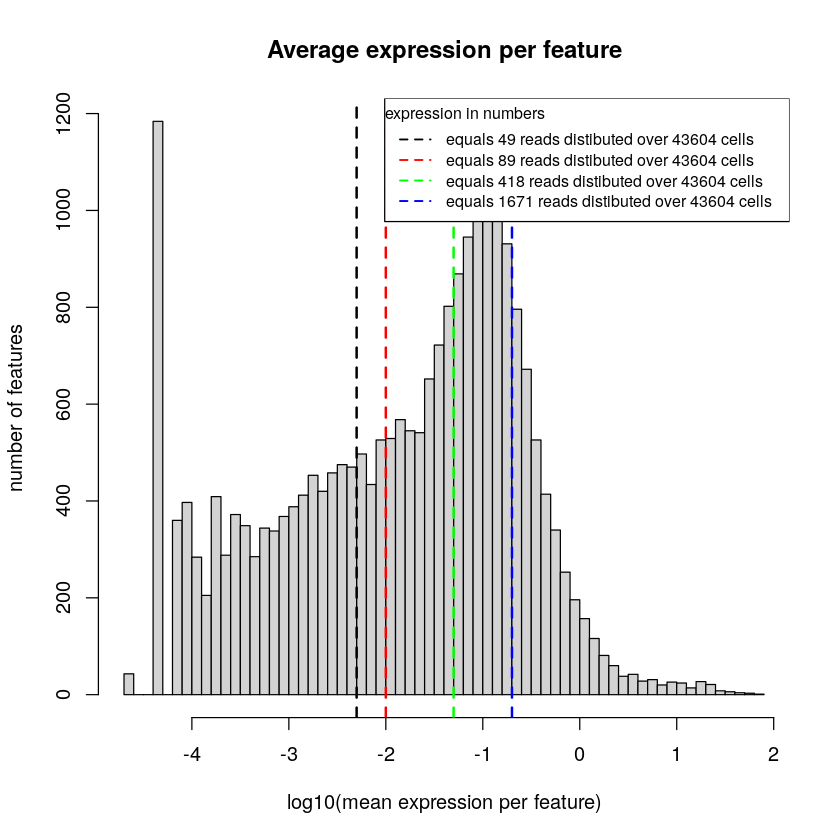

In [ ]:
ave_per_feature=Matrix::rowMeans(darc@assays$RNA@counts)
umi_per_feature=Matrix::rowSums(darc@assays$RNA@counts)
total=dim(darc)[2]
one=format(mean(umi_per_feature[log10(ave_per_feature)<log10(0.2)]),digits=1)
two=format(mean(umi_per_feature[log10(ave_per_feature)<log10(0.05)]),digits=1)
drei=format(mean(umi_per_feature[log10(ave_per_feature)<log10(0.01)]),digits=1)
four=format(mean(umi_per_feature[log10(ave_per_feature)<log10(0.005)]),digits=1)

hist(log10(ave_per_feature),breaks=50,main=c("Average expression per feature"),xlab=c("log10(mean expression per feature)"),
     ylab=c("number of features"))
abline(v=log10(0.2),col="blue",lty=2,lwd=2)
abline(v=log10(0.05),col="green",lty=2,lwd=2)
abline(v=log10(0.01),col="red",lty=2,lwd=2)
abline(v=log10(0.005),col="black",lty=2,lwd=2)

legend("topright", legend=c(paste("equals",four,"reads distibuted over",total,"cells"), 
                            paste("equals",drei,"reads distibuted over",total,"cells"),
                            paste("equals",two,"reads distibuted over",total,"cells"),
                            paste("equals",one,"reads distibuted over",total,"cells")),
       col=c("black", "red","green","blue"), lty=c(2),lwd=1.5, cex=0.8, title="expression in numbers",title.adj=0)

jpeg(paste0(out,sample_ID,"_UMI_per_feature.jpeg"))
hist(log10(ave_per_feature),breaks=50,main=c("Average expression per feature"),xlab=c("log10(mean expression per feature)"),
     ylab=c("number of features"))
abline(v=log10(0.2),col="blue",lty=2,lwd=2)
abline(v=log10(0.05),col="green",lty=2,lwd=2)
abline(v=log10(0.01),col="red",lty=2,lwd=2)
abline(v=log10(0.005),col="black",lty=2,lwd=2)

legend("topright", legend=c(paste("equals",four,"reads distibuted over",total,"cells"), 
                            paste("equals",drei,"reads distibuted over",total,"cells"),
                            paste("equals",two,"reads distibuted over",total,"cells"),
                            paste("equals",one,"reads distibuted over",total,"cells")),
       col=c("black", "red","green","blue"), lty=c(2),lwd=1.5, cex=0.8, title="expression in numbers",title.adj=0)

dev.off()

In [31]:
### aparently Seurat does some automatic excluding of low expressed genes
thresh1=c(0.001)
paste("applying a threshold of",thresh1, "will remove",table(log10(ave_per_feature)>log10(thresh1))[1], "genes",sep=" ")
paste(" and leave",table(log10(ave_per_feature)>log10(thresh1))[2],"in our analysis",sep=" ")
exclude = rownames(darc@assays$RNA@counts)[log10(ave_per_feature)<log10(thresh1)]
darc2=darc[!rownames(darc) %in% exclude,] 
dim(darc)
dim(darc2)

[1] "applying a threshold of 0.001 will remove 5241 genes"

[1] " and leave 18531 in our analysis"

[1] 20656 43604

[1] 18472 43604

png 
  2

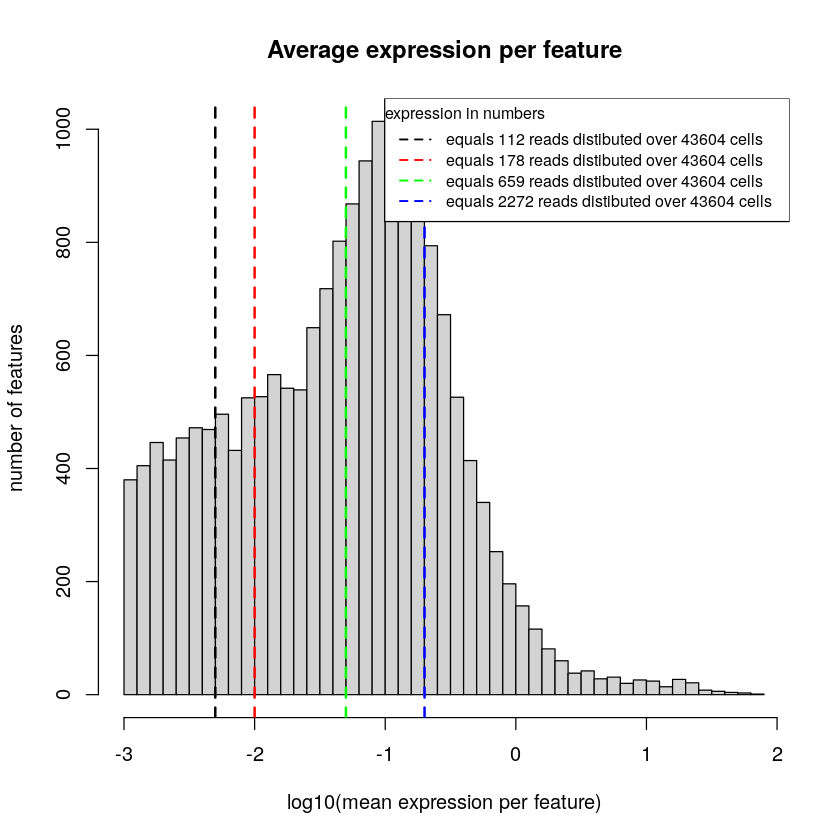

In [32]:
ave_per_feature=Matrix::rowMeans(darc2@assays$RNA@counts)
umi_per_feature=Matrix::rowSums(darc2@assays$RNA@counts)
total=dim(darc)[2]
one=format(mean(umi_per_feature[log10(ave_per_feature)<log10(0.2)]),digits=1)
two=format(mean(umi_per_feature[log10(ave_per_feature)<log10(0.05)]),digits=1)
drei=format(mean(umi_per_feature[log10(ave_per_feature)<log10(0.01)]),digits=1)
four=format(mean(umi_per_feature[log10(ave_per_feature)<log10(0.005)]),digits=1)

hist(log10(ave_per_feature),breaks=50,main=c("Average expression per feature"),xlab=c("log10(mean expression per feature)"),
     ylab=c("number of features"))
abline(v=log10(0.2),col="blue",lty=2,lwd=2)
abline(v=log10(0.05),col="green",lty=2,lwd=2)
abline(v=log10(0.01),col="red",lty=2,lwd=2)
abline(v=log10(0.005),col="black",lty=2,lwd=2)

legend("topright", legend=c(paste("equals",four,"reads distibuted over",total,"cells"), 
                            paste("equals",drei,"reads distibuted over",total,"cells"),
                            paste("equals",two,"reads distibuted over",total,"cells"),
                            paste("equals",one,"reads distibuted over",total,"cells")),
       col=c("black", "red","green","blue"), lty=c(2),lwd=1.5, cex=0.8, title="expression in numbers",title.adj=0)

jpeg(paste0(out,sample_ID,"_UMI_per_feature_CLEANED.jpeg"))
hist(log10(ave_per_feature),breaks=50,main=c("Average expression per feature"),xlab=c("log10(mean expression per feature)"),
     ylab=c("number of features"))
abline(v=log10(0.2),col="blue",lty=2,lwd=2)
abline(v=log10(0.05),col="green",lty=2,lwd=2)
abline(v=log10(0.01),col="red",lty=2,lwd=2)
abline(v=log10(0.005),col="black",lty=2,lwd=2)

legend("topright", legend=c(paste("equals",four,"reads distibuted over",total,"cells"), 
                            paste("equals",drei,"reads distibuted over",total,"cells"),
                            paste("equals",two,"reads distibuted over",total,"cells"),
                            paste("equals",one,"reads distibuted over",total,"cells")),
       col=c("black", "red","green","blue"), lty=c(2),lwd=1.5, cex=0.8, title="expression in numbers",title.adj=0)

dev.off()

## SCT normalization (incl. batch as covariate)  

In [33]:
dat1=SCTransform(darc2, variable.features.n = NULL,vars.to.regress=c("nCount_RNA","percent.mt","CC.Difference","batch"),
            conserve.memory = F, return.only.var.genes = F) %>% RunPCA(verbose = TRUE)
## max memory usage 73 GB

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 18472 by 43604

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

In [8]:
save(dat1,file=paste0(inter.dat,"DARC_merge_nov22_SCTnorm.RData"))

## batch removal with Harmony software

In [9]:
dat1@meta.data$batch=as.factor(dat1@meta.data$batch)
all.vars=as.character(rownames(dat1))
dat1_harmony = RunHarmony(dat1, assay.use="SCT",group.by.vars = "batch",vars_use=all.vars)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.SCT.harmony; see ?make.names for more details on syntax validity”


In [10]:
save(dat1_harmony,file=paste0(inter.dat,"DARC_merge_NOV_SCTnorm_batchREMOVED.RData"))

In [3]:
load(paste0(inter.dat,"DARC_merge_NOV_SCTnorm_batchREMOVED.RData"))

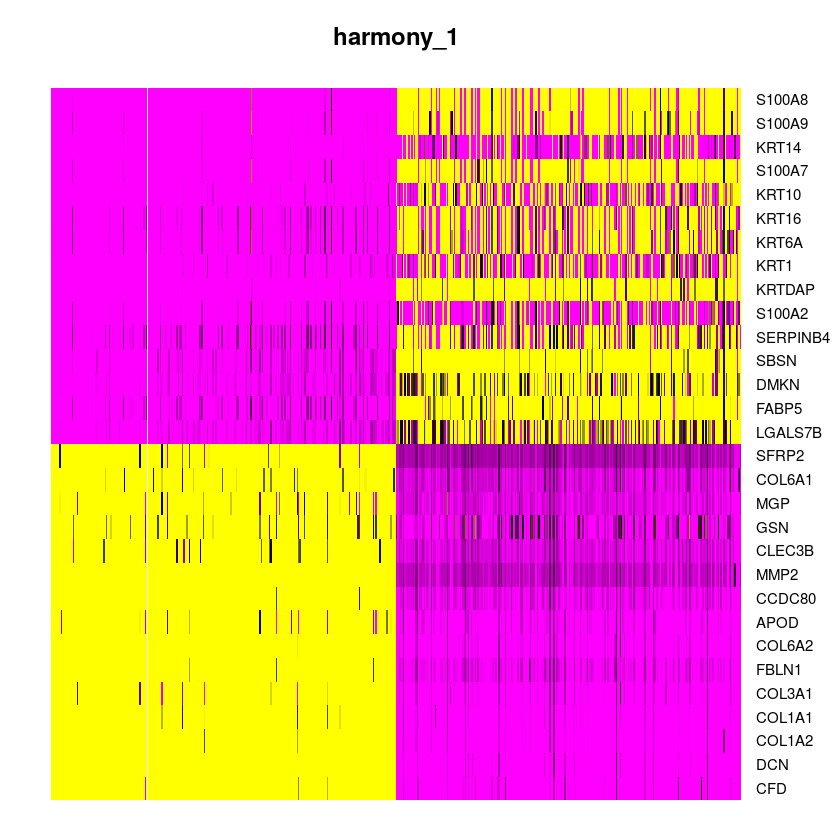

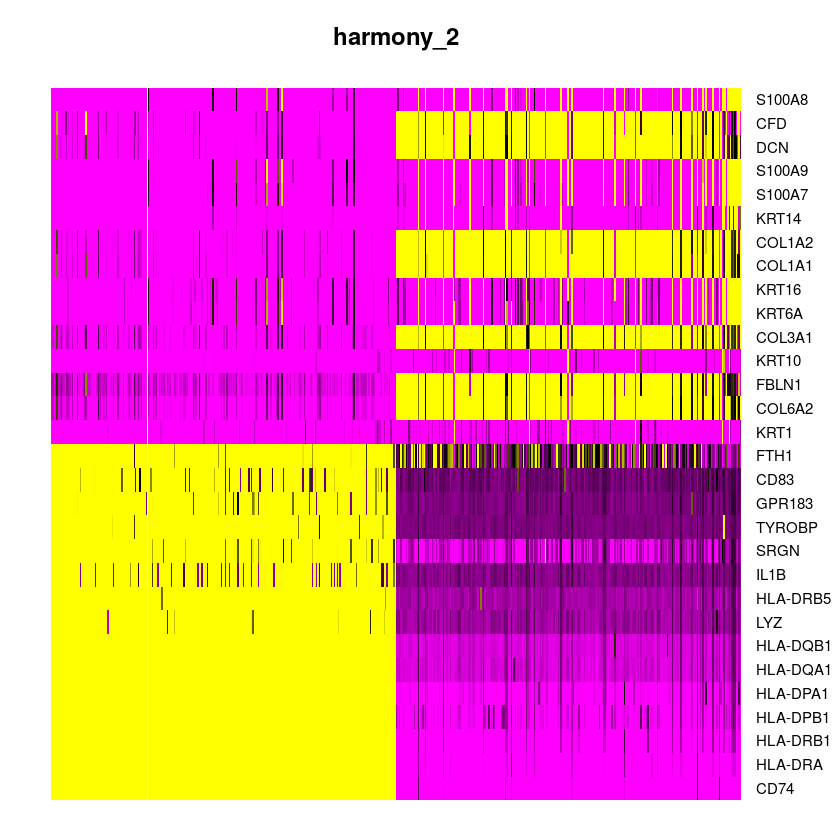

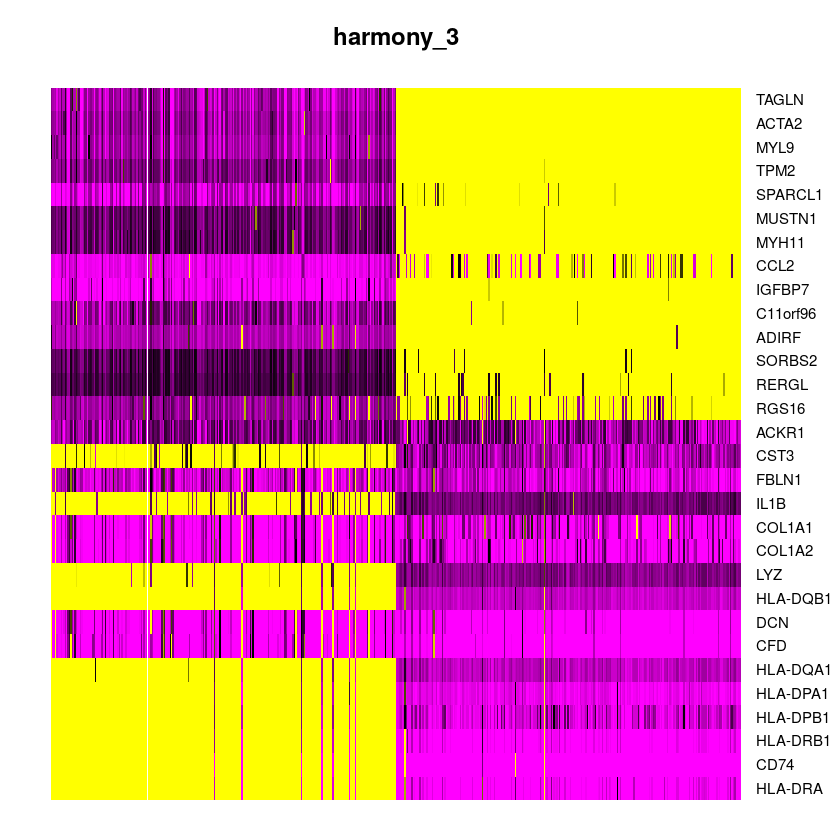

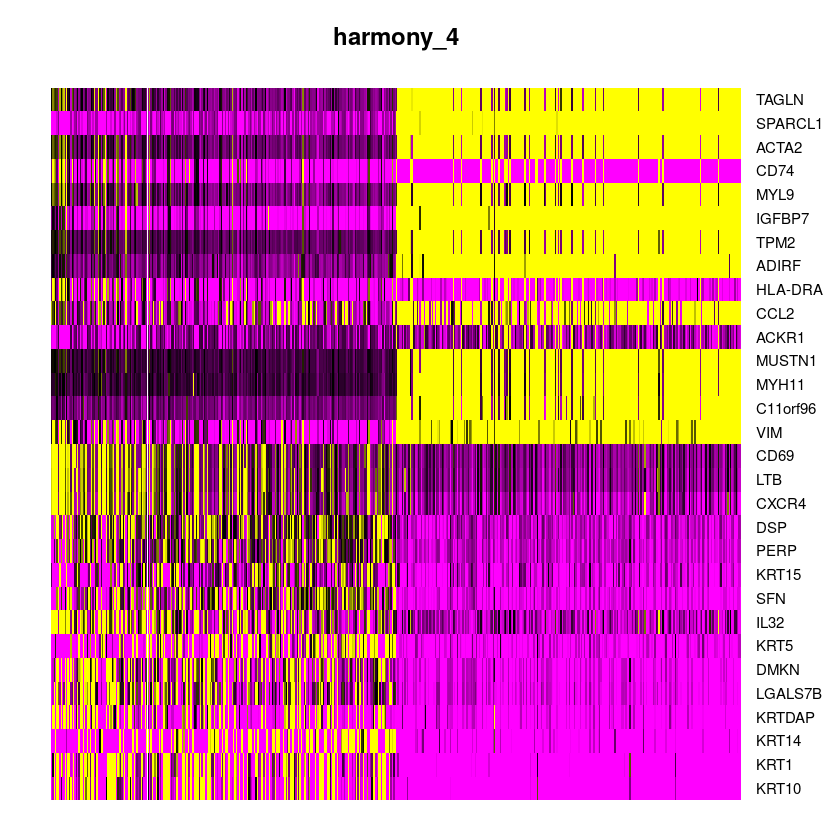

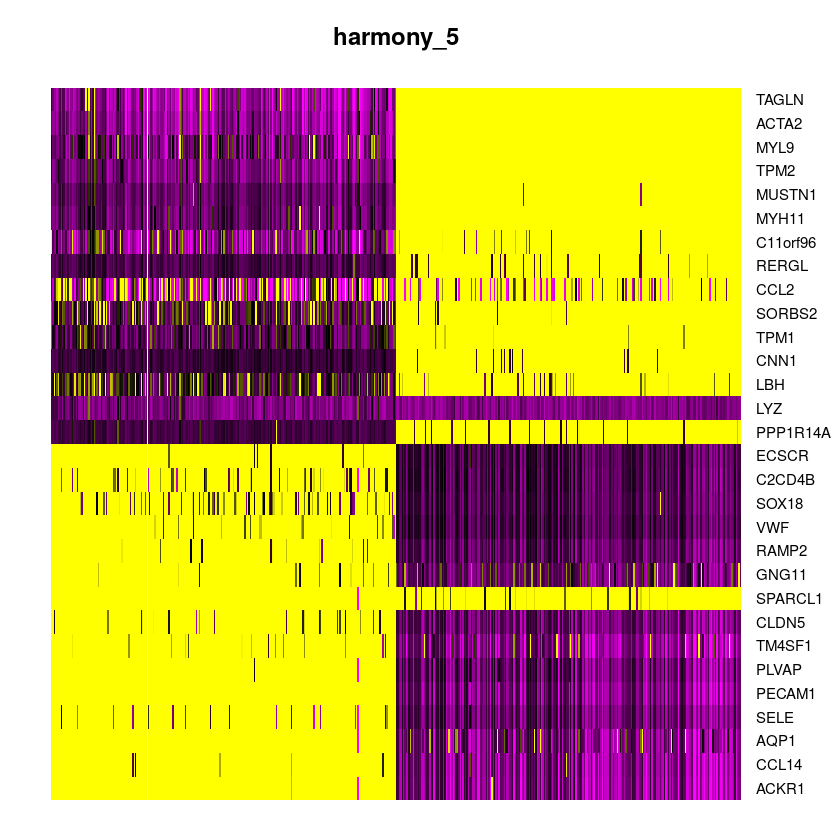

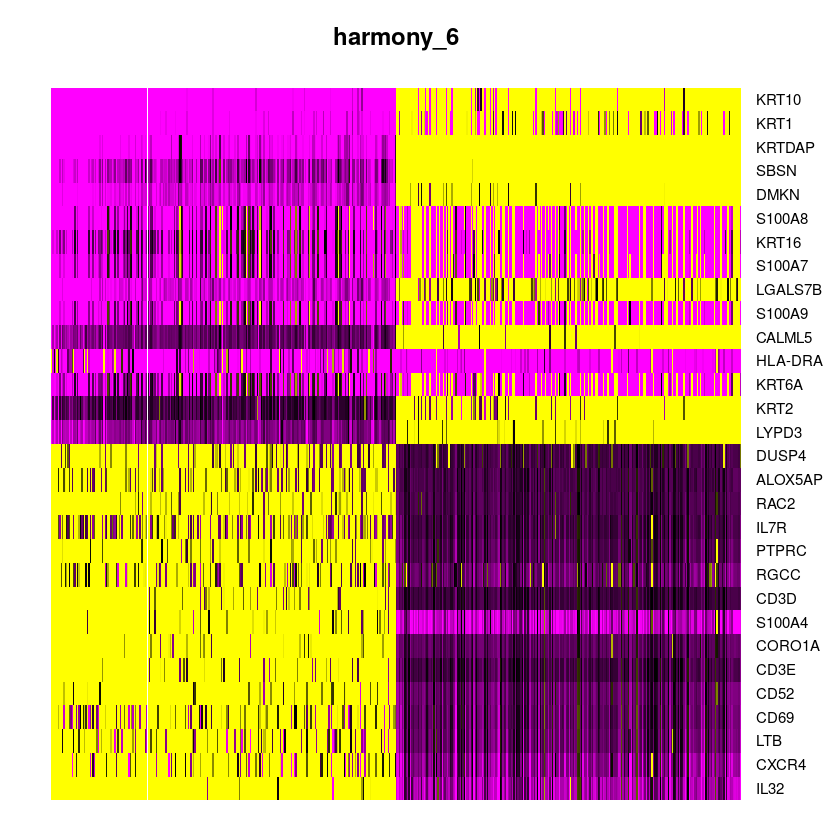

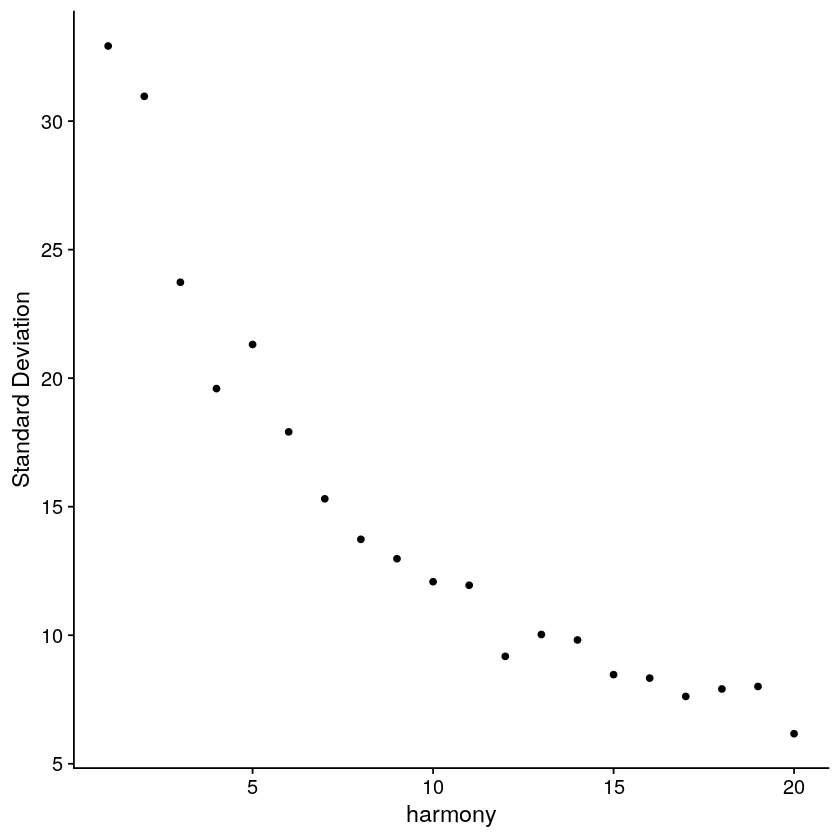

In [4]:
Seurat::DimHeatmap(dat1_harmony, reduction = "harmony",dims = 1, cells = 500, balanced = TRUE)  ### plot the top 500 cells (highest scores)
Seurat::DimHeatmap(dat1_harmony, dims = 2,reduction = "harmony", cells = 500, balanced = TRUE)  ### plot the top 500 cells (highest scores)
Seurat::DimHeatmap(dat1_harmony, dims = 3,reduction = "harmony", cells = 500, balanced = TRUE)
Seurat::DimHeatmap(dat1_harmony, dims = 4, reduction = "harmony",cells = 500, balanced = TRUE)
Seurat::DimHeatmap(dat1_harmony, dims = 5,reduction = "harmony", cells = 500, balanced = TRUE)
Seurat::DimHeatmap(dat1_harmony, dims = 6,reduction = "harmony", cells = 500, balanced = TRUE)
Seurat::ElbowPlot(dat1_harmony,reduction="harmony")

In [8]:
sig_PCs=c(1:15)
dat1_harmony = RunUMAP(dat1_harmony,reduction = "harmony", dims = sig_PCs)
dat1_harmony = RunTSNE(dat1_harmony,reduction = "harmony", dims = sig_PCs)
sce.seurat1=Seurat::FindNeighbors(dat1_harmony,reduction = "harmony",k.param = 20,dims=sig_PCs) 

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:01:18 UMAP embedding parameters a = 0.9922 b = 1.112

09:01:18 Read 43604 rows and found 15 numeric columns

09:01:18 Using Annoy for neighbor search, n_neighbors = 30

09:01:18 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:01:25 Writing NN index file to temp file /tmp/RtmpcguqRk/filebfb0824b302d8

09:01:25 Searching Annoy index using 1 thread, search_k = 3000

09:01:42 Annoy recall = 100%

09:01:43 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

png 
  2

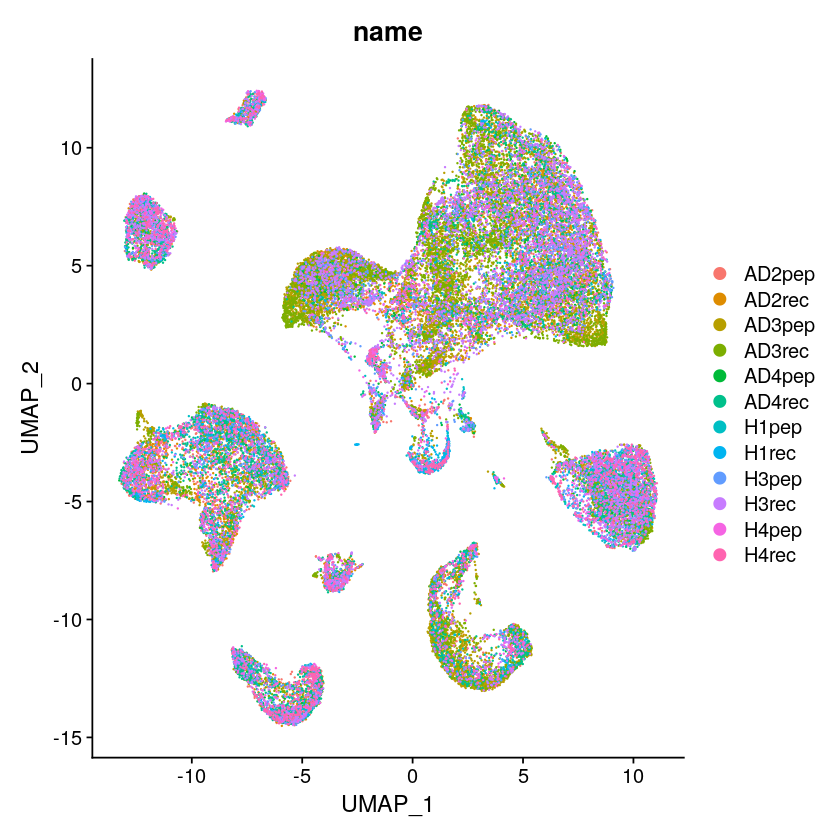

In [15]:
jpeg(paste(out,"combined_initial_batch_TEST_umap.jpeg",sep=""))
UMAPPlot(sce.seurat1,group.by="name")
dev.off()
UMAPPlot(sce.seurat1,group.by="name")

png 
  2

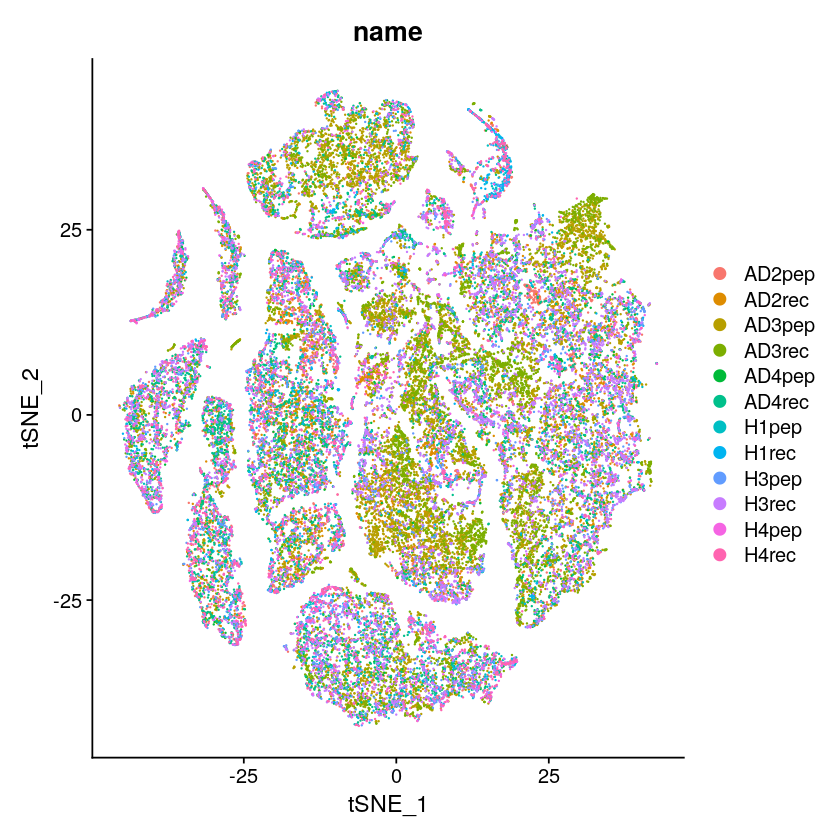

In [6]:
jpeg(paste(out,"combined_initial_batch_TEST_tsne.jpeg",sep=""))
TSNEPlot(sce.seurat1,group.by="name")
dev.off()
TSNEPlot(sce.seurat1,group.by="name")

In [29]:
Idents(sce.seurat1) = sce.seurat1@meta.data$name

png 
  2

png 
  2

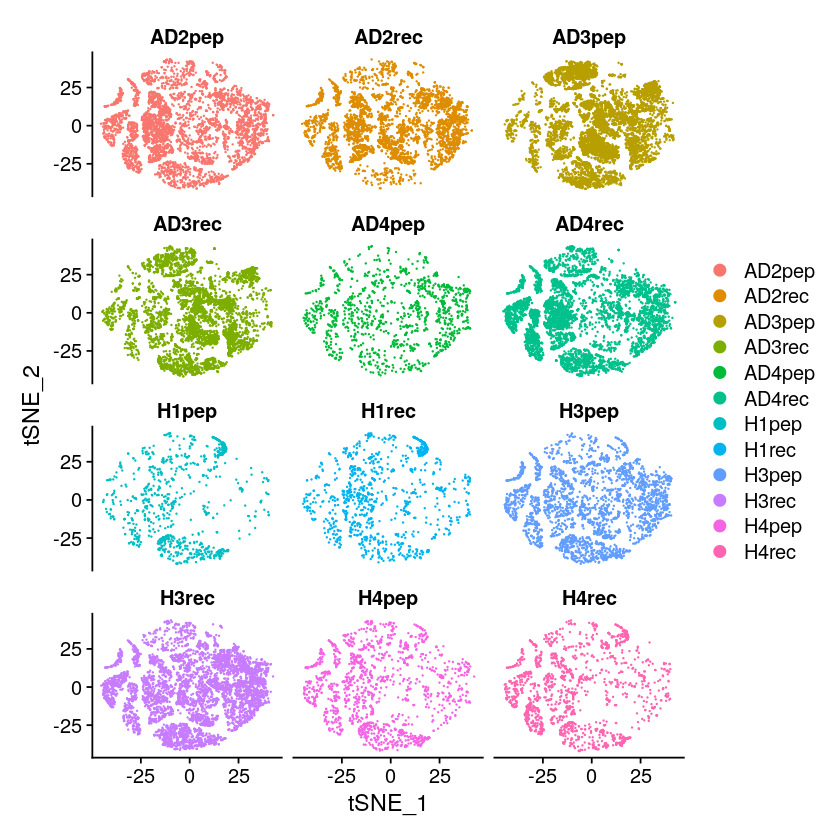

In [33]:
DimPlot(sce.seurat1, reduction = "tsne", split.by = "name",ncol = 3,label = F)
jpeg(paste(out,"combined_proper_batch_TEST_tsne.jpeg",sep=""))
DimPlot(sce.seurat1, reduction = "tsne", split.by = "name",ncol = 3,label = F)
dev.off()
pdf(paste(out,"combined_proper_batch_TEST_tsne.pdf",sep=""))
DimPlot(sce.seurat1, reduction = "tsne", split.by = "name",ncol = 3,label = F)
dev.off()

png 
  2

png 
  2

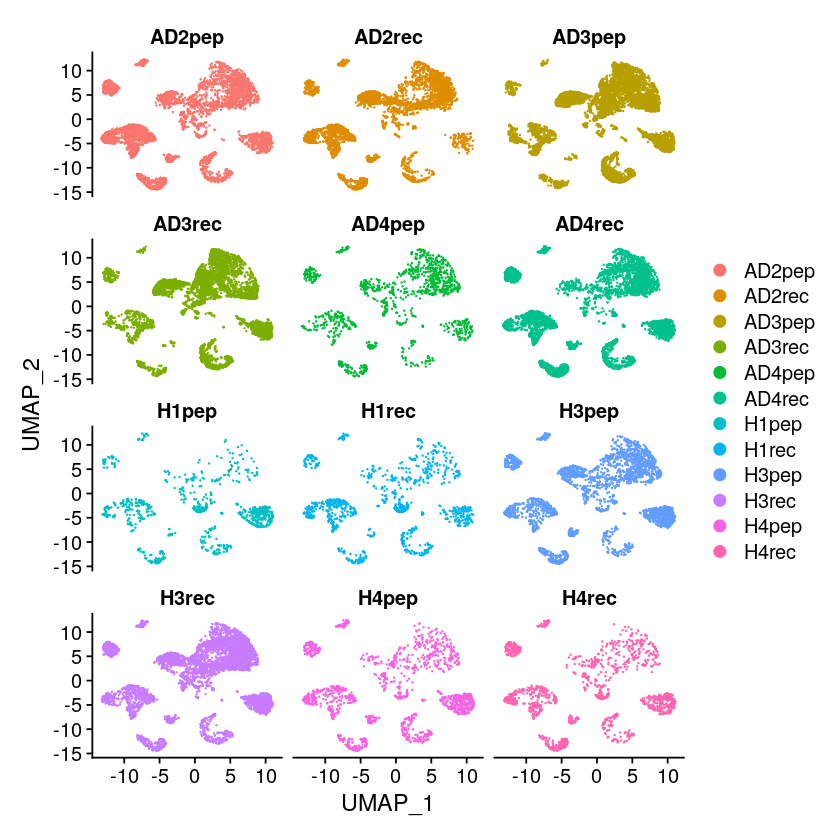

In [35]:
DimPlot(sce.seurat1, reduction = "umap", split.by = "name",ncol = 3,label = F)
jpeg(paste(out,"combined_proper_batch_TEST_umap.jpeg",sep=""))
DimPlot(sce.seurat1, reduction = "umap", split.by = "name",ncol = 3,label = F)
dev.off()
pdf(paste(out,"combined_proper_batch_TEST_umap.pdf",sep=""))
DimPlot(sce.seurat1, reduction = "umap", split.by = "name",ncol = 3,label = F)
dev.off()

In [36]:
head(sce.seurat1@meta.data)


orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGAGCTCTCGG-7 SeuratProject 1159        681         5.6945643  1    
AAACCTGAGGTTACCT-7 SeuratProject 4658       1842         1.8248175  1    
AAACCTGCAGTCAGAG-7 SeuratProject 9147       2661         3.8587669  1    
AAACCTGGTCCAGTTA-7 SeuratProject 3676       1478         0.9521219  1    
AAACCTGTCTCGATGA-7 SeuratProject 8278       2285         5.1220101  1    
AAACCTGTCTCTGCTG-7 SeuratProject 8175       2694         4.0601688  1    
                   nCount_SCT nFeature_SCT S.Score     G2M.Score    Phase
AAACCTGAGCTCTCGG-7 2998        781          0.02978914 -0.006631233 S    
AAACCTGAGGTTACCT-7 4094       1842         -0.02425562 -0.049806099 G1   
AAACCTGCAGTCAGAG-7 4347       2113          0.04875396  0.005871452 S    
AAACCTGGTCCAGTTA-7 3676       1478          0.03278601 -0.005792351 S    
AAACCTGTCTCGATGA-7 4302       1935          0.02553090  0.016076442 S    
AAACCTGTCTCTGCTG-7 4623       2395          0.01675724 -0.043700068 S    
                   old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGAGCTCTCGG-7 SeuratProject 0.036420368   9               9              
AAACCTGAGGTTACCT-7 SeuratProject 0.025550481   1               1              
AAACCTGCAGTCAGAG-7 SeuratProject 0.042882503   0               0              
AAACCTGGTCCAGTTA-7 SeuratProject 0.038578361   3               3              
AAACCTGTCTCGATGA-7 SeuratProject 0.009454454   0               0              
AAACCTGTCTCTGCTG-7 SeuratProject 0.060457312   5               5              
                   name  
AAACCTGAGCTCTCGG-7 AD2pep
AAACCTGAGGTTACCT-7 AD2pep
AAACCTGCAGTCAGAG-7 AD2pep
AAACCTGGTCCAGTTA-7 AD2pep
AAACCTGTCTCGATGA-7 AD2pep
AAACCTGTCTCTGCTG-7 AD2pep

png 
  2

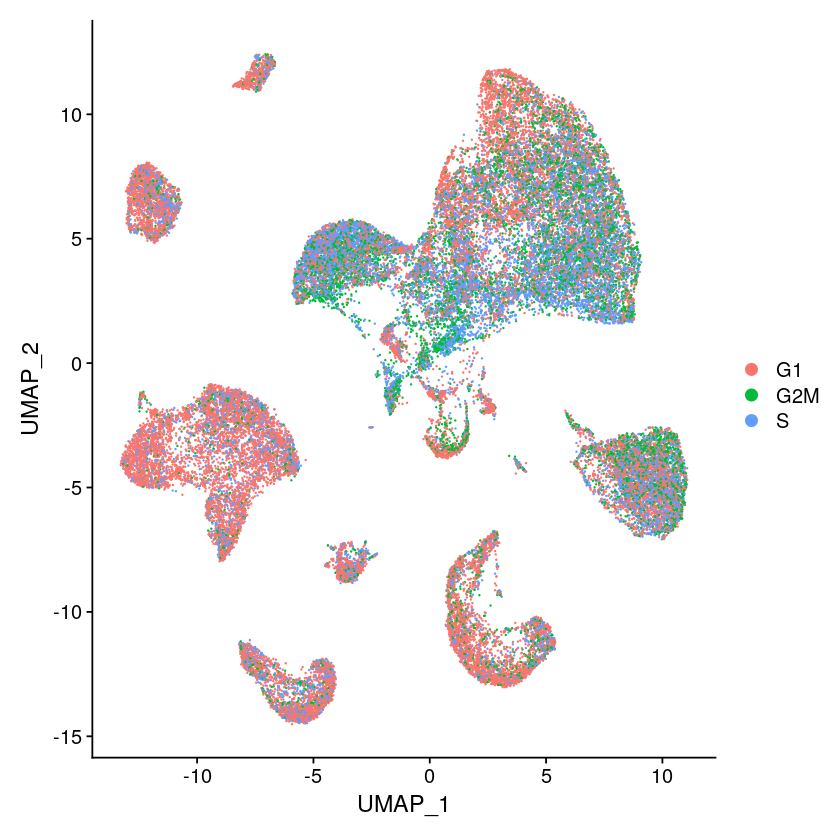

png 
  2

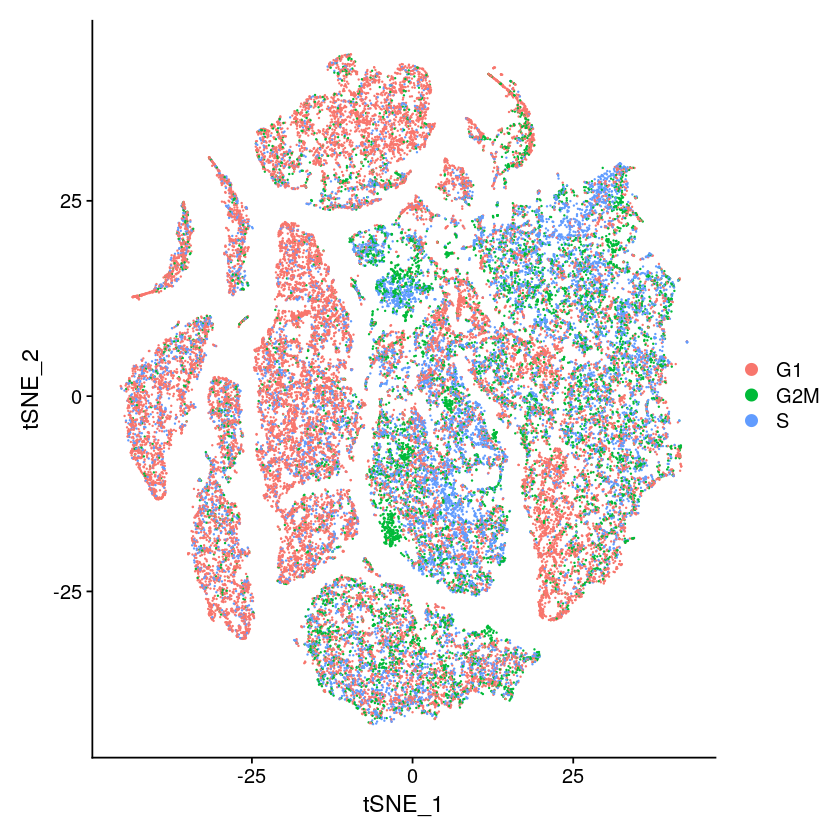

In [37]:
Idents(sce.seurat1)=as.factor(sce.seurat1@meta.data$Phase)
pdf(paste0(out,"combined_CELL_CYCLE_TEST_umap.pdf"))
UMAPPlot(sce.seurat1)
dev.off()
UMAPPlot(sce.seurat1)
TSNEPlot(sce.seurat1)
pdf(paste0(out,"combined_CELL_CYCLE_TEST_umap.pdf"))
TSNEPlot(sce.seurat1)
dev.off()

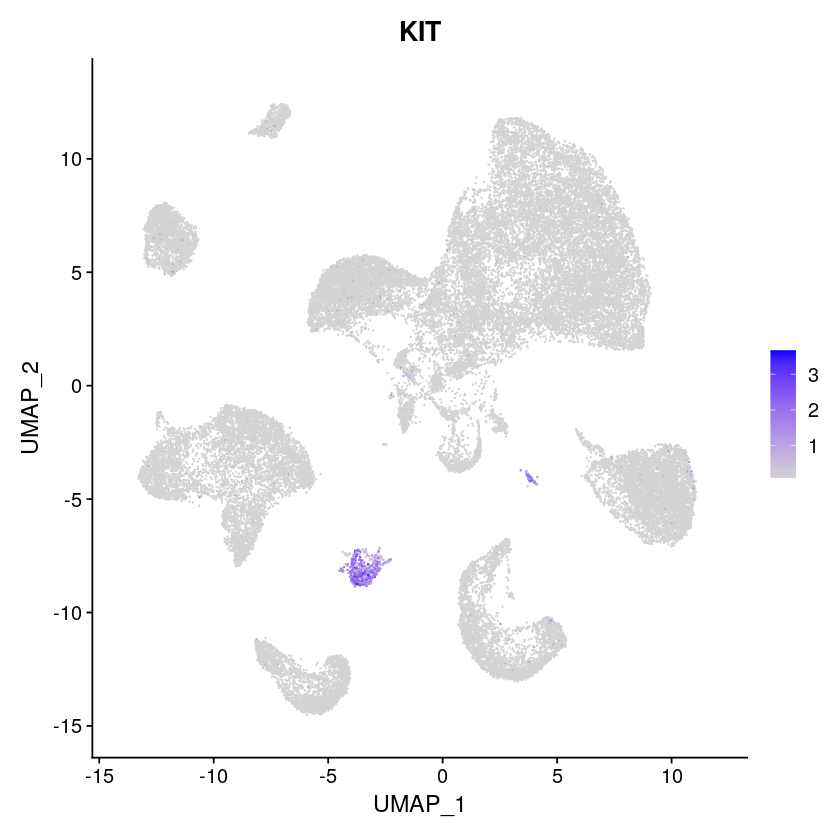

In [59]:
i=c("KIT")
p=FeaturePlot(sce.seurat1, features = as.character(i),min.cutoff=0.1,max.cutoff=5)
    print(p)

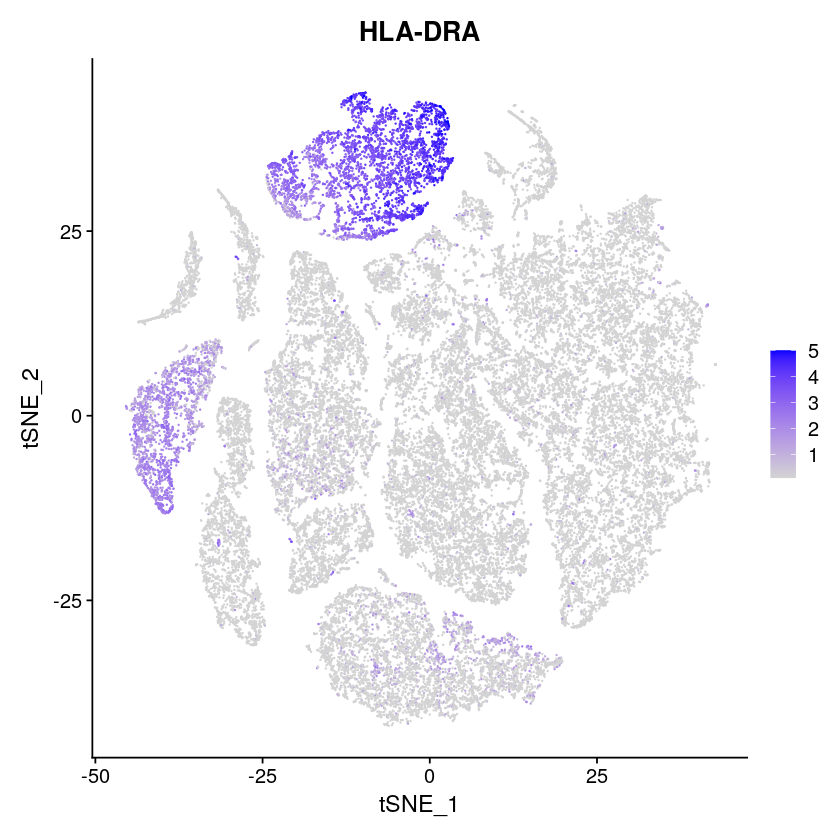

In [7]:
i=c("HLA-DRA") # CD3E COLA1A PECAM1 KRT1 KIT CD4 CD86 HLA-DRA PTPRC IL13 CXCR4 CD69 CD14 CD8A
p=FeaturePlot(sce.seurat1, reduction = "tsne",features = as.character(i),min.cutoff=0.1,max.cutoff=5)
    print(p)

In [26]:
clust_test=function(sce) {
  cont=as.data.frame(matrix(NA,nrow=length(unique(Idents(sce))), ncol=4))
  colnames(cont)=c("cluster","cells","mean_total_UMI","mean_features")
  i=1
  for (k in unique(Idents(sce))) {
    print(c(k))
    cont[i,1]=c(k)
    dat23=sce@assays$RNA@counts[,Idents(sce)%in%c(k)]
    cont[i,2]=table(Idents(sce)%in%c(k))[2]
    cont[i,3]=mean(apply(dat23,2,function(x)sum(x)))
    cont[i,4]=mean(apply(dat23,2,function(x)table(x %in% c(0))[1]))
    i=i+1
  }
  cont=cont[order(as.numeric(as.character(cont$cluster))),]
  return(cont)
}

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 43604
Number of edges: 1434347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9257
Number of communities: 29
Elapsed time: 8 seconds


png 
  2

[1] "8"
[1] "13"
[1] "1"
[1] "4"
[1] "3"
[1] "11"
[1] "7"
[1] "12"
[1] "10"
[1] "5"
[1] "2"
[1] "9"
[1] "24"
[1] "22"
[1] "15"
[1] "0"
[1] "6"
[1] "21"
[1] "18"
[1] "16"
[1] "14"
[1] "20"
[1] "17"
[1] "27"
[1] "23"
[1] "25"
[1] "26"
[1] "19"
[1] "28"


cluster cells mean_total_UMI mean_features
16 0       4265   5959.426      1978.6685    
3  1       3705   8071.236      2195.7970    
11 2       3355   4008.718      1541.9598    
5  3       3310   6396.437      1951.9073    
4  4       3175   2855.294      1156.7061    
10 5       2739   7046.531      1934.6053    
17 6       2421   8510.412      2148.3152    
7  7       2112   4157.104      1302.9356    
1  8       2099   6729.817      2093.3573    
12 9       1984   6043.112      1896.6598    
9  10      1694   2045.207       898.3666    
6  11      1683   4675.678      1656.5966    
8  12      1673   4537.011      1650.7591    
2  13      1357   5085.015      1844.6227    
21 14       848   2912.866      1115.2264    
15 15       845   4041.644      1615.1254    
20 16       790   3148.454      1296.7747    
23 17       766   9648.234      2356.7128    
19 18       720   2610.365       282.9472    
28 19       704   4468.838      1584.5156    
22 20       678  10348.901      2836.7537    
18 21       668   4822.900      1356.1677    
14 22       629   6454.407      2070.6614    
25 23       415  31026.952      4732.2120    
13 24       370   6410.965      1653.4946    
26 25       247   9581.194      1239.2105    
27 26       163  17777.104      2983.9387    
24 27       111   2242.162       959.4505    
29 28        78   3529.397      1232.4487

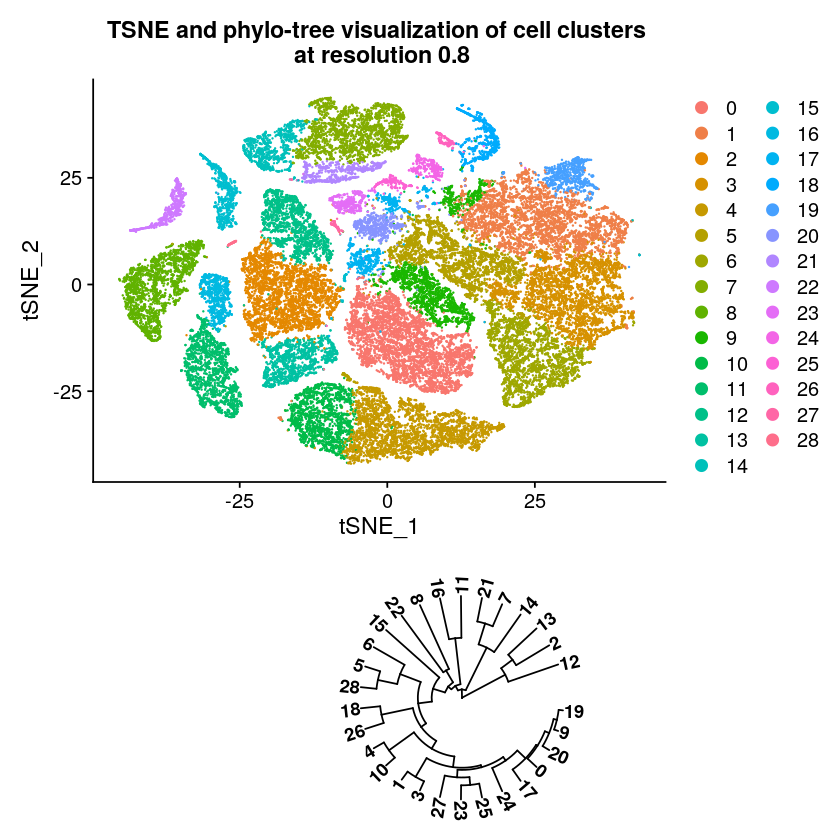

In [27]:
sig_PCs=c(1:15)
clust.res=0.8
sce.seurat1=Seurat::FindClusters(sce.seurat1,resolution=clust.res)  
sce.seurat1= Seurat::BuildClusterTree(sce.seurat1,dims=sig_PCs)
tree1=sce.seurat1@tools$`Seurat::BuildClusterTree`
pl=Seurat::DimPlot(sce.seurat1, reduction = "tsne")
pl= pl+ ggtitle(paste("TSNE and phylo-tree visualization of cell clusters \n at resolution",clust.res,sep=" ")) +
  theme (plot.title = element_text(color="black", size=14, face="bold",hjust = 0.5))
pl.matrix=ggplot_build(pl)$data[1][[1]]
uni_pl_mat=pl.matrix[!duplicated(pl.matrix$group),]
tr=ggtree(tree1,layout="circular") + geom_tiplab(aes(angle=angle), lwd=5,offset=.5,fontface="bold")  
plot_grid(pl, tr, align = "v", nrow = 2, rel_heights = c(2/3, 1/3),axis="l")    
pdf(paste0(out,"combined_initial_CLUSTERING_res08.pdf"))
 plot_grid(pl, tr, align = "v", nrow = 2, rel_heights = c(2/3, 1/3),axis="l")
dev.off()
res1=clust_test(sce.seurat1)
res1
write.csv(res1,file=paste0(out,"combined_initial_CLUSTERING_res08.csv"))

## we will use clustering at resolution 0.3 for association testing
## NEW: we will use resolution 0.8 (dsam, 29.11.2022)

In [28]:
sce.seurat1@meta.data$seurat_clusters = sce.seurat1@meta.data$SCT_snn_res.0.8
Idents(sce.seurat1) = sce.seurat1@meta.data$SCT_snn_res.0.8
head(sce.seurat1@meta.data)

orig.ident    nCount_RNA nFeature_RNA percent.mt batch
AAACCTGAGCTCTCGG-7 SeuratProject 1159        681         5.6945643  1    
AAACCTGAGGTTACCT-7 SeuratProject 4658       1842         1.8248175  1    
AAACCTGCAGTCAGAG-7 SeuratProject 9147       2661         3.8587669  1    
AAACCTGGTCCAGTTA-7 SeuratProject 3676       1478         0.9521219  1    
AAACCTGTCTCGATGA-7 SeuratProject 8278       2285         5.1220101  1    
AAACCTGTCTCTGCTG-7 SeuratProject 8175       2694         4.0601688  1    
                   nCount_SCT nFeature_SCT S.Score     G2M.Score    Phase
AAACCTGAGCTCTCGG-7 2998        781          0.02978914 -0.006631233 S    
AAACCTGAGGTTACCT-7 4094       1842         -0.02425562 -0.049806099 G1   
AAACCTGCAGTCAGAG-7 4347       2113          0.04875396  0.005871452 S    
AAACCTGGTCCAGTTA-7 3676       1478          0.03278601 -0.005792351 S    
AAACCTGTCTCGATGA-7 4302       1935          0.02553090  0.016076442 S    
AAACCTGTCTCTGCTG-7 4623       2395          0.01675724 -0.043700068 S    
                   old.ident     CC.Difference SCT_snn_res.0.2 seurat_clusters
AAACCTGAGCTCTCGG-7 SeuratProject 0.036420368   9               8              
AAACCTGAGGTTACCT-7 SeuratProject 0.025550481   1               13             
AAACCTGCAGTCAGAG-7 SeuratProject 0.042882503   0               1              
AAACCTGGTCCAGTTA-7 SeuratProject 0.038578361   3               4              
AAACCTGTCTCGATGA-7 SeuratProject 0.009454454   0               3              
AAACCTGTCTCTGCTG-7 SeuratProject 0.060457312   5               11             
                   name   SCT_snn_res.0.8
AAACCTGAGCTCTCGG-7 AD2pep 8              
AAACCTGAGGTTACCT-7 AD2pep 13             
AAACCTGCAGTCAGAG-7 AD2pep 1              
AAACCTGGTCCAGTTA-7 AD2pep 4              
AAACCTGTCTCGATGA-7 AD2pep 3              
AAACCTGTCTCTGCTG-7 AD2pep 11

## save analysis ready object

In [29]:
## create groups for differential expression analyis
sce.seurat1@meta.data$outcome = rep("H", nrow(sce.seurat1@meta.data))
sce.seurat1@meta.data$outcome[sce.seurat1@meta.data$name %in% c("AD2rec","AD2pep","AD3rec","AD3pep","AD4rec","AD4pep")]=c("AD")
## fine grained
sce.seurat1@meta.data$outcome2 = rep("H_rec", nrow(sce.seurat1@meta.data))
sce.seurat1@meta.data$outcome2[sce.seurat1@meta.data$name %in% c("H1pep","H3pep","H4pep")]=c("H_pep")
sce.seurat1@meta.data$outcome2[sce.seurat1@meta.data$name %in% c("AD2pep","AD3pep","AD4pep")]=c("AD_pep")
sce.seurat1@meta.data$outcome2[sce.seurat1@meta.data$name %in% c("AD2rec","AD3rec","AD4rec")]=c("AD_rec")
##
save(sce.seurat1,file=paste0(inter.dat,"DARC_merge_NOV_ANALYSIS_READY_08.RData"))

## check assoc between PC and technical factors

In [71]:
phe=sce.seurat1@meta.data[,c("percent.mt","nCount_RNA","nFeature_RNA","nCount_SCT","nFeature_SCT","S.Score","batch","CC.Difference","Phase")]
phe$ID=as.character(rownames(sce.seurat1@meta.data))
pcs=sce.seurat1@reductions$harmony@cell.embeddings[,1:15]
reg.dat=as.data.frame(cbind(phe,pcs))

In [73]:
## batch
sig_PCs=c(15)
mt_vs_PCs=data.frame(ID= rep(NA,sig_PCs),Estimate=rep(NA,sig_PCs),std_err=rep(NA,sig_PCs),t_val=rep(NA,sig_PCs),P_val=rep(NA,sig_PCs))

for (k in 1:sig_PCs){
  fit=summary(lm(paste("harmony_",k,"~ batch",sep=""),data=reg.dat))$coefficients[2,]
  mt_vs_PCs[k,1]=paste("harmony_",k,sep="")
  mt_vs_PCs[k,2:5]=fit
}
print(paste("multiple testing threshold is ",0.05/sig_PCs,sep=""))
print("++++++++++ associations between batch and PCs in analysis +++++++++++++")
mt_vs_PCs

[1] "multiple testing threshold is 0.00333333333333333"
[1] "++++++++++ associations between batch and PCs in analysis +++++++++++++"


ID         Estimate   std_err   t_val      P_val       
1  harmony_1  -6.3207327 0.6958867 -9.0829914 1.099336e-19
2  harmony_2  -2.9509877 0.6633283 -4.4487587 8.658145e-06
3  harmony_3  -0.6787826 0.5059492 -1.3416023 1.797320e-01
4  harmony_4   2.4764391 0.4184699  5.9178431 3.286225e-09
5  harmony_5   0.2846862 0.4595556  0.6194815 5.356025e-01
6  harmony_6  -2.6484583 0.3838374 -6.8999478 5.273034e-12
7  harmony_7   2.6225511 0.3276792  8.0034093 1.239898e-15
8  harmony_8  -0.1371747 0.2955127 -0.4641923 6.425123e-01
9  harmony_9  -0.8744726 0.2801870 -3.1210323 1.803359e-03
10 harmony_10  0.1921905 0.2610714  0.7361606 4.616369e-01
11 harmony_11  0.3146802 0.2579984  1.2196985 2.225858e-01
12 harmony_12 -0.6214448 0.1971566 -3.1520366 1.622457e-03
13 harmony_13 -0.2008644 0.2161078 -0.9294638 3.526539e-01
14 harmony_14  1.4495128 0.2087083  6.9451611 3.833128e-12
15 harmony_15 -0.2246775 0.1829988 -1.2277534 2.195462e-01

In [74]:
## mitochondiral RNA
sig_PCs=c(15)
mt_vs_PCs=data.frame(ID= rep(NA,sig_PCs),Estimate=rep(NA,sig_PCs),std_err=rep(NA,sig_PCs),t_val=rep(NA,sig_PCs),P_val=rep(NA,sig_PCs))

for (k in 1:sig_PCs){
  fit=summary(lm(paste("harmony_",k,"~ percent.mt",sep=""),data=reg.dat))$coefficients[2,]
  mt_vs_PCs[k,1]=paste("harmony_",k,sep="")
  mt_vs_PCs[k,2:5]=fit
}
print(paste("multiple testing threshold is ",0.05/sig_PCs,sep=""))
print("++++++++++ associations between mitochondiral RNA content and PCs in analysis +++++++++++++")
mt_vs_PCs

[1] "multiple testing threshold is 0.00333333333333333"
[1] "++++++++++ associations between mitochondiral RNA content and PCs in analysis +++++++++++++"


ID         Estimate    std_err    t_val       P_val        
1  harmony_1  -0.51778254 0.05394049  -9.5991444  8.471528e-22
2  harmony_2  -0.62573758 0.05069783 -12.3424913  6.117305e-35
3  harmony_3   0.42932225 0.03887033  11.0449858  2.527636e-28
4  harmony_4  -0.85608398 0.03187637 -26.8563823 1.368960e-157
5  harmony_5  -0.01899060 0.03495432  -0.5432978  5.869276e-01
6  harmony_6   0.31806173 0.02933733  10.8415360  2.370847e-27
7  harmony_7   0.13815511 0.02509790   5.5046476  3.719866e-08
8  harmony_8   0.03947245 0.02252109   1.7526881  7.966259e-02
9  harmony_9  -0.07809363 0.02128256  -3.6693718  2.434368e-04
10 harmony_10  0.03485031 0.01981643   1.7586572  7.864277e-02
11 harmony_11 -0.00379160 0.01959124  -0.1935355  8.465405e-01
12 harmony_12 -0.02228693 0.01505583  -1.4802865  1.388040e-01
13 harmony_13  0.05761277 0.01644984   3.5023302  4.616691e-04
14 harmony_14 -0.17471269 0.01607872 -10.8660853  1.813562e-27
15 harmony_15 -0.07253307 0.01388690  -5.2231291  1.767311e-07

In [75]:
## mitochondiral RNA
sig_PCs=c(15)
mt_vs_PCs=data.frame(ID= rep(NA,sig_PCs),Estimate=rep(NA,sig_PCs),std_err=rep(NA,sig_PCs),t_val=rep(NA,sig_PCs),P_val=rep(NA,sig_PCs))

for (k in 1:sig_PCs){
  fit=summary(lm(paste("harmony_",k,"~ nCount_RNA",sep=""),data=reg.dat))$coefficients[2,]
  mt_vs_PCs[k,1]=paste("harmony_",k,sep="")
  mt_vs_PCs[k,2:5]=fit
}
print(paste("multiple testing threshold is ",0.05/sig_PCs,sep=""))
print("++++++++++ associations between library size and PCs in analysis +++++++++++++")
mt_vs_PCs

[1] "multiple testing threshold is 0.00333333333333333"
[1] "++++++++++ associations between library size and PCs in analysis +++++++++++++"


ID         Estimate      std_err      t_val       P_val       
1  harmony_1  -3.184731e-05 2.311717e-05  -1.3776477 1.683192e-01
2  harmony_2  -5.371324e-06 2.174289e-05  -0.2470382 8.048798e-01
3  harmony_3  -2.533374e-04 1.662041e-05 -15.2425515 2.518479e-52
4  harmony_4   2.448206e-04 1.370945e-05  17.8578016 4.506737e-71
5  harmony_5   9.571733e-05 1.495785e-05   6.3991358 1.578408e-10
6  harmony_6  -1.097408e-04 1.256598e-05  -8.7331644 2.562559e-18
7  harmony_7   5.519617e-06 1.074874e-05   0.5135128 6.075953e-01
8  harmony_8  -4.475539e-06 9.642162e-06  -0.4641634 6.425330e-01
9  harmony_9  -4.580136e-06 9.112981e-06  -0.5025947 6.152518e-01
10 harmony_10  2.980294e-05 8.483014e-06   3.5132493 4.431099e-04
11 harmony_11  2.135973e-05 8.386883e-06   2.5468015 1.087493e-02
12 harmony_12 -2.388408e-05 6.444925e-06  -3.7058734 2.109238e-04
13 harmony_13  4.655726e-05 7.040051e-06   6.6131996 3.804342e-11
14 harmony_14 -1.818283e-05 6.892467e-06  -2.6380736 8.340808e-03
15 harmony_15 -4.948988e-05 5.942466e-06  -8.3281717 8.446060e-17

## Association testing NOW !!

In [30]:
clust.n=as.character(unique(Idents(sce.seurat1)))
clust.size=table(Idents(sce.seurat1))
clust.size
clust.n=as.character(unique(Idents(sce.seurat1)))
sce.seurat=sce.seurat1


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
4265 3705 3355 3310 3175 2739 2421 2112 2099 1984 1694 1683 1673 1357  848  845 
  16   17   18   19   20   21   22   23   24   25   26   27   28 
 790  766  720  704  678  668  629  415  370  247  163  111   78 

In [ ]:
# ====================================.  prep input data
clust.n=as.character(unique(Idents(sce.seurat)))
clust.size=table(Idents(sce.seurat))
clust.size
max_per_cluster=c(5000)  
clust.n=as.character(unique(Idents(sce.seurat)))
rm(res_wilcox)

### ---------------------------------------------   one vs one for all cluster
for (i in clust.n) {        ##  case loop
     contr.clust=clust.n[!clust.n %in% i]
    for (k in contr.clust) {    ## contr loop
        if (i == k) {
            next
        }  
         print(paste("computing markers for cluster", i,"compared to",k,"now!!!", sep=" "))
          seurat_cluster_0 = FindMarkers(sce.seurat, ident.1 = i, ident.2 = k,test.use = "wilcox",
                                 logfc.threshold = 0.15,max.cells.per.ident = max_per_cluster,
                                min.cells.group=30,only.pos = TRUE)  # min.pct = 0.3
          seurat_cluster_0=seurat_cluster_0[seurat_cluster_0$p_val_adj < 0.05,]
            seurat_cluster_0$ID=as.character(rownames(seurat_cluster_0))
          seurat_cluster_0$case_CLUSTER=rep(i,nrow(seurat_cluster_0))
          seurat_cluster_0$contr_CLUSTER=rep(k,nrow(seurat_cluster_0))
          seurat_cluster_0$clust_size=rep(as.numeric(clust.size[i]),nrow(seurat_cluster_0))
          sce.case=sce.seurat[rownames(sce.seurat) %in%  as.character(seurat_cluster_0$ID),Idents(sce.seurat)%in%c(i)]
          sce.contr=sce.seurat[rownames(sce.seurat) %in%  as.character(seurat_cluster_0$ID),Idents(sce.seurat)%in%c(k)]
            seurat_cluster_0=seurat_cluster_0[as.character(rownames(sce.case)), ]
            seurat_cluster_0$case_total_umi=Matrix::rowSums(sce.case@assays$RNA@counts)
            seurat_cluster_0$contr_total_umi=Matrix::rowSums(sce.contr@assays$RNA@counts)
            ##.   ------------- get AUC
            auc.sce=merge(sce.case,sce.contr)
            seurat_cluster_0=seurat_cluster_0[as.character(rownames(auc.sce)), ]
            response=rep(1,length(Idents(auc.sce)))                                       
            response[Idents(auc.sce)%in% c(i)]=2
            seurat_cluster_0$AUC=apply(auc.sce@assays$SCT@data,1,function(x)auc(response,as.numeric(x),quiet=T,allow.invalid.partial.auc.correct=F))                     
        if(!exists("res_wilcox")){
            res_wilcox=seurat_cluster_0
          }else {
            res_wilcox=rbind(res_wilcox,seurat_cluster_0)
          }
      rm(seurat_cluster_0,response,sce.contr,sce.case,auc.sce)
    } ## contr loop
}  ## case loop                                                                  


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
4265 3705 3355 3310 3175 2739 2421 2112 2099 1984 1694 1683 1673 1357  848  845 
  16   17   18   19   20   21   22   23   24   25   26   27   28 
 790  766  720  704  678  668  629  415  370  247  163  111   78 

Warning message in rm(res_wilcox):
“object 'res_wilcox' not found”


In [91]:
save(res_wilcox,file=paste0(out,"combined_ASSOC_result_cluster_",sample_ID, ".RData"))
head(res_wilcox)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     ID      
VWA1     2.015293e-287 0.4349158  0.457 0.087 3.722650e-283 VWA1    
TNFRSF14  3.558826e-68 0.1759509  0.312 0.133  6.573863e-64 TNFRSF14
VAMP3     7.305021e-98 0.2182361  0.357 0.137  1.349384e-93 VAMP3   
RBP7      0.000000e+00 0.6188230  0.450 0.004  0.000000e+00 RBP7    
TNFRSF1B 1.893355e-137 0.2229265  0.286 0.064 3.497406e-133 TNFRSF1B
EFHD2     2.489935e-99 0.2109679  0.304 0.100  4.599408e-95 EFHD2   
         case_CLUSTER contr_CLUSTER clust_size case_total_umi contr_total_umi
VWA1     8            3             2099       2786            565           
TNFRSF14 8            3             2099       1297            856           
VAMP3    8            3             2099       1622           1011           
RBP7     8            3             2099       4624             40           
TNFRSF1B 8            3             2099       1164            388           
EFHD2    8            3             2099       1586            797           
         AUC      
VWA1     0.6913864
TNFRSF14 0.5897243
VAMP3    0.6115401
RBP7     0.7232271
TNFRSF1B 0.6110758
EFHD2    0.6027687

In [83]:
enrich.lists=c('WikiPathways_2019_Human','KEGG_2019_Human' ,'Reactome_2016','BioPlanet_2019','Human_Gene_Atlas','ARCHS4_Tissues',
               'Mouse_Gene_Atlas','GO_Biological_Process_2018','GO_Molecular_Function_2018','MSigDB_Hallmark_2020')
screen.overlaps=c('MSigDB_Hallmark_2020','Human_Gene_Atlas','ARCHS4_Tissues','Mouse_Gene_Atlas','KEGG_2019_Human')
###      ----------------------   NEW CURRENT VERSION.  !!!!!!!!!
tiering_thresh=data.frame(case_perc=c(0.5,0.3),contr_perc=c(0.05,0.05))
AUC_tier3=c(0.7)
lgFC_tier3=c(0.25)
maxCONTR=length(unique(res_wilcox$contr_CLUSTER))-1
markerN=5
### ----------------------------- tiering function
tiering=function(dat,markerN){
    dat=dat[order(-dat$AUC),]
    order.ID=dat$ID[!duplicated(dat$ID)]   ### returns them in order of apperance !
    ok.ID=order.ID[1:markerN]
    dat12=dat[dat$ID %in% as.character(ok.ID),]
return(dat12)
}
##------------------------------------------
all.cases=unique(res_wilcox$case_CLUSTER)
for (k in all.cases) {
    print(noquote(c('--------------------------------------------------------------------------------')))
    print(noquote(paste0("--------------   processing cluster ",k," as CASES now !!   ------------------------")))
    ## -------------------------------------------------------  prep full MACR dataset
    inter=res_wilcox[res_wilcox$case_CLUSTER %in% k,]
    dim(inter)
    for (t in c("TIER","DUPL","nameCONT","panel","panel_descr",unique(inter$contr_CLUSTER))){
        inter[,t]=NA
    } 
    ### ---------------------------------------------   start
    rm(final.out)
    for (tier in c(1,2)){
        if (!exists("final.out")){
            int.t1a=inter[inter$pct.1>tiering_thresh[tier,1] & inter$pct.2 < tiering_thresh[tier,2],]
            int.t1a$TIER=c(tier)
        } else if (tier %in% c(2)) {
            inter1=inter[!(inter$ID %in% final.out$ID),]
            int.t1a=inter1[inter1$pct.1>tiering_thresh[tier,1] & inter1$pct.2 < tiering_thresh[tier,2],]
            int.t1a$TIER=c(tier)
        } else if ( tier %in% c(3)){
            inter1=inter[!(inter$ID %in% final.out$ID),]
            #int.t1a=inter1[inter1$AUC> as.numeric(AUC_tier3) & inter1$avg_logFC > lgFC_tier3,]
            int.t1a=inter1[inter1$avg_logFC > lgFC_tier3,]
            int.t1a$TIER=c(tier)
        }
    ### ------------   prep data per TIER
        rm(int.t1)
        for (kt in unique(int.t1a$ID)) {
            int2=int.t1a[int.t1a$ID %in% kt,]
            entr=as.character(int2$contr_CLUSTER)
            int2$DUPL=length(entr)
            int2$nameCONT = paste(entr,sep='',collapse=" | ")
            for (j in entr) {
                int2[,j]=c(1)
                }  
            if(!exists("int.t1")){
                int.t1=int2
                }else {
                int.t1=rbind(int.t1,int2) 
            }
        }
    ### -------------------------------------
    ### create panels -- per TIER   
        spec=NA
        for (r in maxCONTR:1) {  
            dat=int.t1[int.t1$DUPL %in% r,]
            #print (paste("this is control ", r, sep=" "))
            if (max(int.t1$DUPL) < r) {  
                #print (paste("skip ",r ,"!!!"))
                next 
                } else if (any(dat$DUPL %in% maxCONTR)) {
                        #print (c("found a lot of data"))         
                        dat12=tiering(dat,markerN)
                        spec=c(spec,as.character(dat12$contr_CLUSTER))
                        int.t1$panel[int.t1$ID %in% unique(dat12$ID)]=paste0("TIER",tier,"_panel")        
                    } ### a lot of data else if
                    else if (nrow(dat) > 1 & length(spec)<2){
                        #print (c("found data for the first time"))   
                        dat12=tiering(dat,markerN)
                        spec=c(spec,as.character(dat12$contr_CLUSTER))
                        int.t1$panel[int.t1$ID %in% unique(dat12$ID)]=paste0("TIER",tier,"_panel")   
                      }
                    else if (nrow(dat) > 1){
                       # print (c("found data !!!")) 
                        freq.t=as.data.frame(table(spec))
                        stay.in=freq.t$spec[freq.t$Freq < markerN]
                        dat=dat[dat$contr_CLUSTER %in% stay.in, ]
                        if (nrow(dat) > 1){
                            dat12=tiering(dat,markerN)
                            spec=c(spec,as.character(dat12$contr_CLUSTER))
                            int.t1$panel[int.t1$ID %in% unique(dat12$ID)]=paste0("TIER",tier,"_panel") 
                        } else { next }
                    }
        } # for loop
###. -------
        fin.int=as.data.frame(table(int.t1$contr_CLUSTER[!is.na(int.t1$panel)]))
        zeros=unique(inter$contr_CLUSTER)[!(unique(inter$contr_CLUSTER) %in% fin.int$Var1)]
        if (length(zeros >0)){
            fin.int=rbind(fin.int,data.frame(Var1=zeros,Freq=rep(0,length(zeros))))
        }
        pan.descr=paste(paste(fin.int$Freq, fin.int$Var1,sep="x"),sep="",collapse=" ")
        int.t1$panel_descr[int.t1$panel %in% paste0("TIER",tier,"_panel")] = c(pan.descr)  
## 
        print(noquote(paste0(" TIER ",tier, " Markerpanel:")))
        print(noquote(paste(unique(int.t1$ID[int.t1$panel %in% paste0("TIER",tier,"_panel") ]))))
        if(!exists("final.out")){
            final.out=int.t1
        } else {
            final.out=rbind(final.out,int.t1)
        }
    } # close tiering loop
    assign(paste0("all_tiers_", k), final.out)  ### keep this for phenotype loop
    write.table(final.out,file=paste0(out,"MARKERS_specific_",k,"_allTIERs.txt"),sep="\t",col.names=T,row.names=F,quote=F)
    print(noquote(paste0('written to file: ', out,"MARKERS_specific_",k,"_allTIERs.txt")))
####.  ----------------------------------   run enrichment
    dat1=final.out[final.out$TIER %in% c("1","2"),]
    g.list=dat1$ID[!duplicated(dat1$ID)]
    invisible(capture.output(enr.result <- enrichr(as.character(g.list),enrich.lists)))
#####.  ---------------------------------    screen overlaps and create list
    for (over in enrich.lists) {
        if(over %in% screen.overlaps){
            print(noquote(paste("           ++++++++ cluster",k, "overlaps to",over,"++++++++     ")))
            print(noquote((enr.result)[[over]][1:5,c(1,2,4)]))
        }
        inter=head((enr.result)[[over]],n=20)
        if (!exists("over.fin")){
            over.fin=inter
        }else {
            over.fin=as.data.frame(rbind(over.fin, inter))
            }
        }
    write.table(over.fin,file=paste0(out,"OVERLAPS_specific_",k,"_TIER_1_2.txt"),sep="\t",col.names=T,row.names=F,quote=F)
    print(noquote(paste0('written to file: ', out,"OVERLAPS_specific_",k,"_TIER_1_2.txt")))
    rm(over.fin)
    
}          

[1] --------------------------------------------------------------------------------
[1] --------------   processing cluster 8 as CASES now !!   ------------------------


Warning message in rm(final.out):
“object 'final.out' not found”
Warning message in rm(int.t1):
“object 'int.t1' not found”


[1]  TIER 1 Markerpanel:
 [1] ACKR1   SELE    EMCN    ECSCR   SOX17   CCL14   PLVAP   CLDN5   TSPAN7 
[10] IGFBP2  SPARCL1 COL15A1 JAM2   
[1]  TIER 2 Markerpanel:
[1] FAM110D TACR1   CSF3    MEOX1   ADM5   
[1] written to file: /home/fs71707/mwielsch1/data/jupyter_data/DARC/result/MARKERS_specific_8_allTIERs.txt
[1]            ++++++++ cluster 8 overlaps to KEGG_2019_Human ++++++++     
                                     Term Overlap Adjusted.P.value
1                          Focal adhesion  29/199     1.732056e-11
2          Cell adhesion molecules (CAMs)  23/145     5.706181e-10
3 Human T-cell leukemia virus 1 infection  25/219     6.625618e-08
4  Fluid shear stress and atherosclerosis  19/139     2.738514e-07
5    Leukocyte transendothelial migration  17/112     2.838365e-07
[1]            ++++++++ cluster 8 overlaps to Human_Gene_Atlas ++++++++     
             Term Overlap Adjusted.P.value
1            Lung  52/299     7.895761e-26
2    SmoothMuscle  42/363     2.999135e-14
3

## start here

In [9]:
rm(list=ls())
library(Seurat)
sessionInfo()
getwd()

R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] sp_1.5-0           SeuratObject_4.1.2 Seurat_4.2.0      

loaded via a namespace (and not attached):
  [1] Rtsne_0.16            colorspace_2.0-3      deldir_1.0-6         
  [4] ellipsis_0.3.2        ggridges_0.5.4        IRdisplay_1.1        
  [7]

[1] "/gpfs/data/fs71707/dsam/DARC/DARC/notebooks"

In [10]:
dir=c("/gpfs/data/fs71707/dsam/data/DARC/DARC/")
out=c("/home/fs71707/dsam/data/DARC/DARC/result/")
inter.dat=c("/home/fs71707/dsam/data/DARC/DARC/proc_data/")
w.dir=c("/home/fs71707/dsam/data/DARC/DARC/notebooks/")
sample_ID=c("DARC_Nov22")

In [11]:
load(paste0(inter.dat,"DARC_merge_NOV_ANALYSIS_READY.RData"))

## Annotate clusters based on specific markers

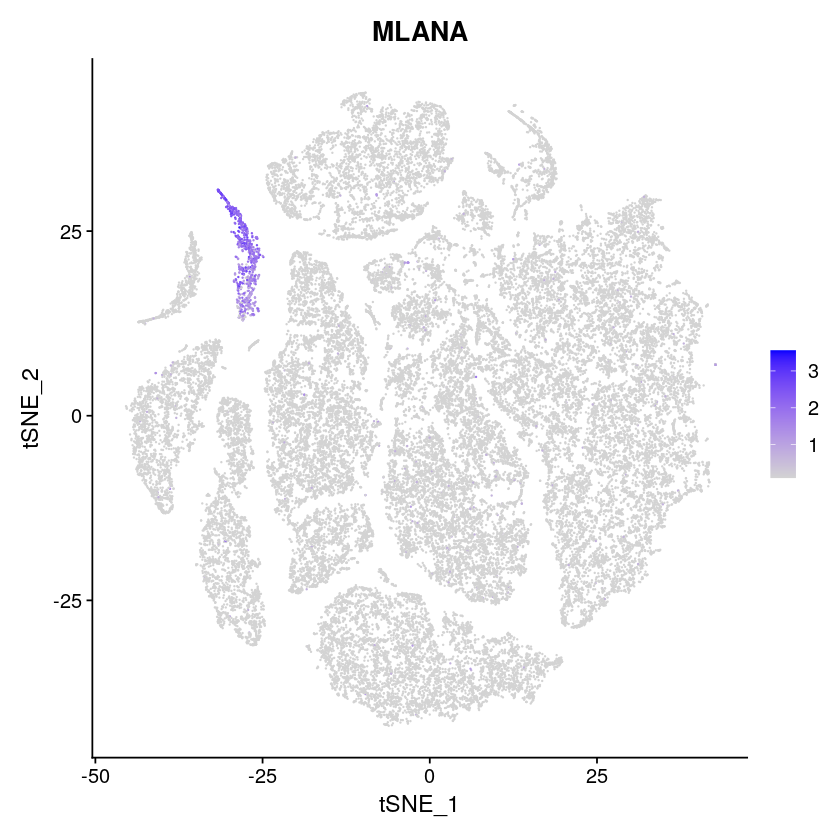

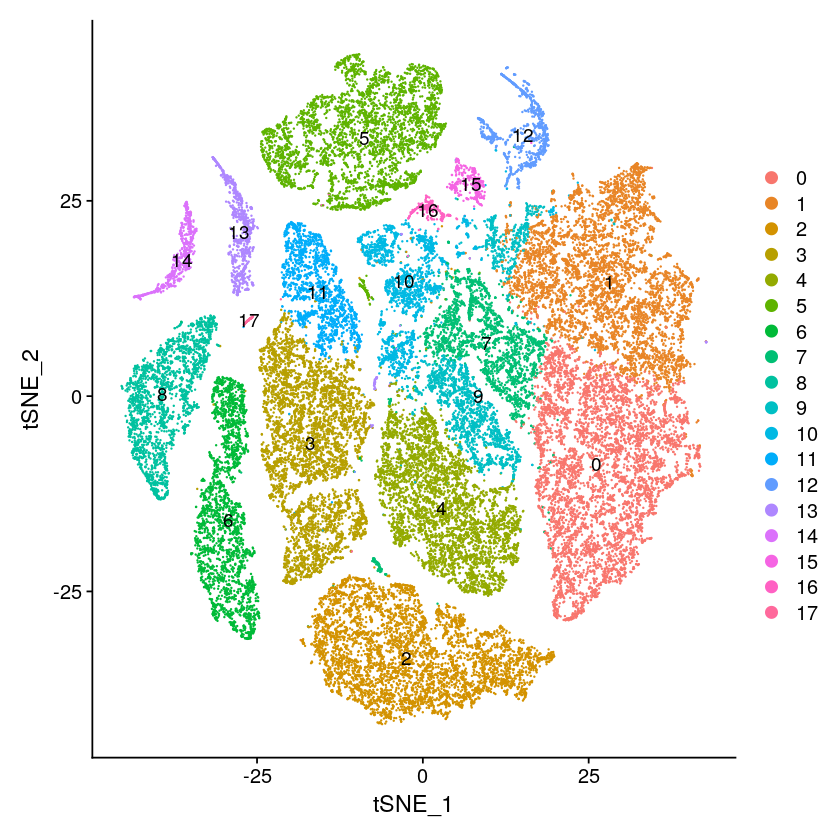

In [4]:
i=c("MLANA")    
p=FeaturePlot(sce.seurat1, reduction = "tsne",features = as.character(i),min.cutoff=0.1,max.cutoff=5)
    print(p)
DimPlot(sce.seurat1, reduction = "tsne", label=TRUE)

In [ ]:
## give them an identity
sce.seurat1@meta.data$celltype[sce.seurat1@meta.data$seurat_clusters %in% c(0)]=c("keratinocyte 1")
#...

## Calculate differentially expressed genes

In [ ]:
# import a dataframe of CASE and CTRL and ID
import_list=read.table(paste0(out,"treatment_per_cluster.txt"),sep="\t",header=T)
head(import_list)

In [ ]:
sce.seurat=apc.final 
# ====================================.  prep input data
Idents(sce.seurat)=sce.seurat@meta.data$cluster_treatments  ### check before running
clust.n=as.character(unique(Idents(sce.seurat)))
clust.size=table(Idents(sce.seurat))
#clust.size
max_per_cluster=c(2000) #adapt based on maximum cells!!  
clust.n=as.character(unique(Idents(sce.seurat)))
rm(res_wilcox)

### ---------------------------------------------   case vs control for each cluster (based on file)

 for (k in 1:nrow(import_list)) { 
         print(paste("computing markers for comparison", import_list$ID[k],"comparing ",import_list$CASE[k], " to",import_list$CONT[k],"now!!!", sep=" "))
          seurat_cluster_0 = FindMarkers(sce.seurat, ident.1 = import_list$CASE[k], ident.2 = import_list$CONT[k],test.use = "wilcox",
                                 ,max.cells.per.ident = max_per_cluster,
                                min.cells.group=5)  # min.pct = 0.3
    ## removed min logFC   
        
        if (nrow(seurat_cluster_0) <1 ) {
            print (paste ("nothing for",import_list$ID[k]))
                next
            } else {

            
            seurat_cluster_0$compareID=rep(as.character(import_list$ID[k]),nrow(seurat_cluster_0))
          #seurat_cluster_0=seurat_cluster_0[seurat_cluster_0$p_val_adj < 0.05,] kein p-Wert exclusion
            seurat_cluster_0$ID=as.character(rownames(seurat_cluster_0))
          seurat_cluster_0$case_CLUSTER=rep(as.character(import_list$CASE[k]),nrow(seurat_cluster_0))
          seurat_cluster_0$contr_CLUSTER=rep(as.character(import_list$CONT[k]),nrow(seurat_cluster_0))
          seurat_cluster_0$clust_size_case=rep(as.numeric(clust.size[import_list$CASE[k]]),nrow(seurat_cluster_0))
            seurat_cluster_0$clust_size_cont=rep(as.numeric(clust.size[import_list$CONT[k]]),nrow(seurat_cluster_0))
            sce.case=sce.seurat[rownames(sce.seurat) %in%  as.character(seurat_cluster_0$ID),Idents(sce.seurat)%in% import_list$CASE[k]]
          sce.contr=sce.seurat[rownames(sce.seurat) %in%  as.character(seurat_cluster_0$ID),Idents(sce.seurat)%in% import_list$CONT[k]]
            
            seurat_cluster_0=seurat_cluster_0[as.character(rownames(sce.case)), ]
            seurat_cluster_0$case_total_umi=Matrix::rowSums(sce.case@assays$RNA@counts)
           seurat_cluster_0$contr_total_umi=Matrix::rowSums(sce.contr@assays$RNA@counts)
            seurat_cluster_0$case_mean_umi=Matrix::rowMeans(sce.case@assays$RNA@counts) #mean UMI counts
           seurat_cluster_0$contr_mean_umi=Matrix::rowMeans(sce.contr@assays$RNA@counts) #mean UMI counts
            
    
        if(!exists("res_wilcox")){
            res_wilcox=seurat_cluster_0
          }else {
            res_wilcox=rbind(res_wilcox,seurat_cluster_0)
          }
        
      rm(seurat_cluster_0,sce.contr,sce.case)#,auc.sce,response)
        } ## no rows in find cluster else       
    }